In [79]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
import requests
from io import BytesIO, StringIO
import missingno as msno
from wordcloud import WordCloud
import plotly.express as px
import os
from sklearn.metrics import accuracy_score

import sys  
from sklearn.preprocessing import OneHotEncoder
# Read system parameters.
from sklearn.model_selection import train_test_split, \
                                    learning_curve, \
                                    GridSearchCV
from sklearn.linear_model import LinearRegression, \
                                 ElasticNet
from sklearn.linear_model import  Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, \
                            mean_absolute_error, \
                            mean_squared_error
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import GradientBoostingClassifier

import xgboost                                              # Build gradient boosting models.
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMRegressor
import pickle                                               # Save Python objects as binary files.
import warnings                                             # Suppress warnings.
warnings.filterwarnings('ignore')

# Ensure results are reproducible.
np.random.seed(1)

import scipy.stats as stats
from IPython.display import HTML, display
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
%matplotlib inline

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [80]:
!pip install pycodestyle
!pip install --index-url https://test.pypi.org/simple/ nbpep8

Looking in indexes: https://test.pypi.org/simple/


In [81]:
from nbpep8.nbpep8 import pep8


# Loading the data 

## Training data

In [82]:
train_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
train_df.head()
pep8(_ih)

cell_content.py:1:80: E501 line too long (93 > 79 characters)



## Test data 

In [83]:
test_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
test_df.head()
pep8(_ih)

cell_content.py:1:80: E501 line too long (91 > 79 characters)



In [84]:
test_df.describe()

pep8(_ih)

## Sample submission data 

In [85]:
sample_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv")
sample_df.head()
pep8(_ih)

cell_content.py:1:80: E501 line too long (106 > 79 characters)



# Exploratory data Analysis

In [86]:
train_df.info()
pep8(_ih)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [87]:
train_df.describe()
pep8(_ih)

# Let's check for duplicated rows

In [88]:
duplicated = train_df[train_df.duplicated(subset=['Id'])]
duplicated
pep8(_ih)

There is no duplicated data in our train_df dataset.


## How about missing values?

In [89]:
train_df.isnull().sum().sort_values(ascending=False)
pep8(_ih)

### As we can see, our dataset contains columns with high missing values. To have a better precision of what the missing values ​​of our dataset represent, we will calculate their percentage.

In [90]:
pct_missing = train_df.isnull().sum().sum() / train_df.size
print(f"The missing values ​​represent :{pct_missing}")
pep8(_ih)

The missing values ​​represent :0.05889565364451209



## Let's determine the percentage of missing values per column

In [91]:
data_size = train_df.shape
nb_rows = data_size[0]
pep8(_ih)

In [92]:
pct_missing_per_col = train_df.isnull().sum().sort_values(ascending=False)/nb_rows
print(pct_missing_per_col)
pep8(_ih)

PoolQC         0.995205
MiscFeature    0.963014
Alley          0.937671
Fence          0.807534
FireplaceQu    0.472603
                 ...   
ExterQual      0.000000
Exterior2nd    0.000000
Exterior1st    0.000000
RoofMatl       0.000000
SalePrice      0.000000
Length: 81, dtype: float64
cell_content.py:1:80: E501 line too long (82 > 79 characters)



As we can see our dataset contains variables with more than 90% missing values. These are essentially Pool quality, .

## We will make a graphical representation of the missing values ​​by columns

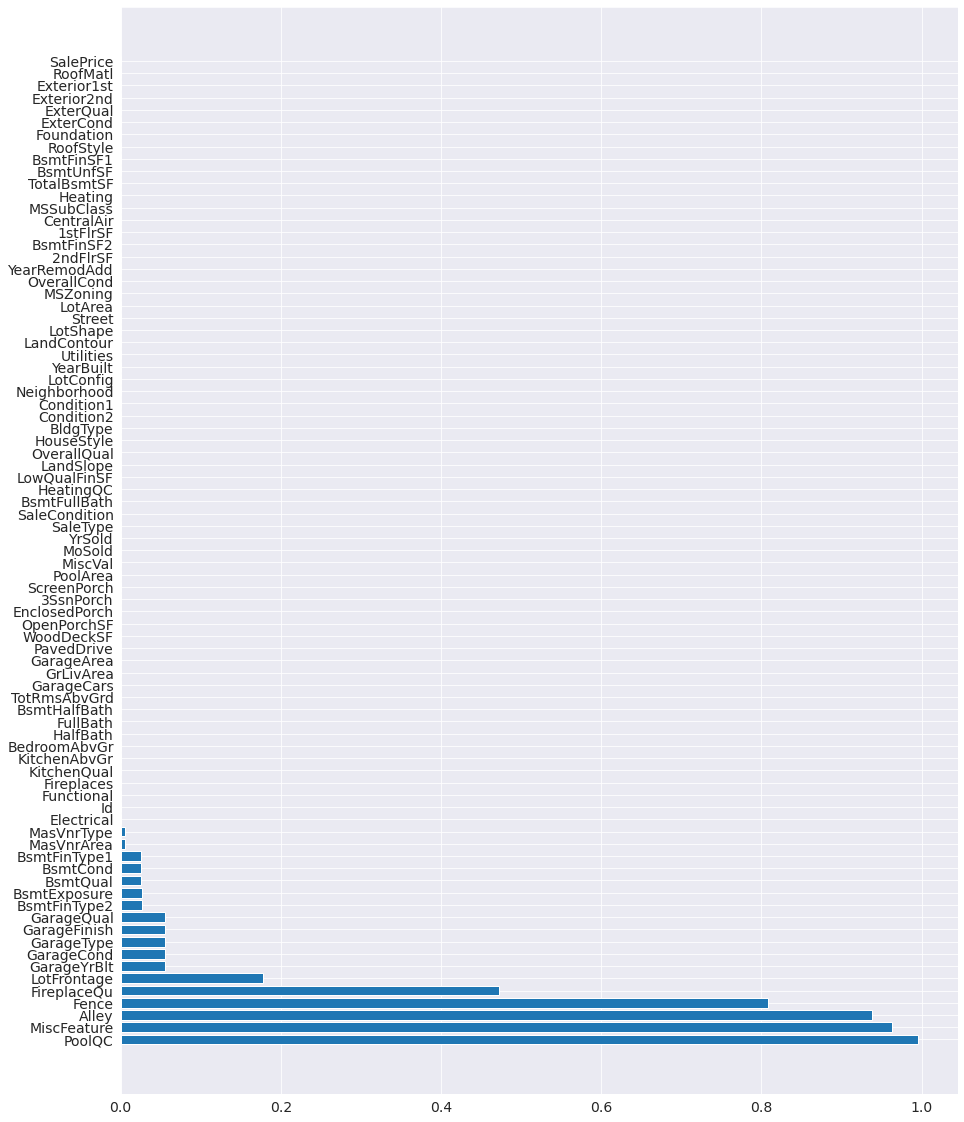

In [93]:
plt.figure(figsize=(15, 20))
plt.barh(pct_missing_per_col.index, pct_missing_per_col.values)
pep8(_ih)

# Missing values percentage per column in train data

In [94]:
print('Percentage of missing values for each column in train data')
tot = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum() / train_df.isnull().count()).sort_values(ascending=False)
missing_df = pd.concat([tot, round(percent * 100, 2)], axis=1, keys=['Total', 'Percent'])
missing_df = missing_df[missing_df.Total >= 1]
pep8(_ih)

Percentage of missing values for each column in train data
cell_content.py:3:80: E501 line too long (92 > 79 characters)
cell_content.py:4:80: E501 line too long (89 > 79 characters)



# Missing values percentage per column in test data

In [95]:
print('Percentage of missing values for each column in train data')
tot = test_df.isnull().sum().sort_values(ascending=False)
percent = (test_df.isnull().sum() / test_df.isnull().count()).sort_values(ascending=False)
missing_df = pd.concat([tot, round(percent * 100, 2)], axis=1, keys=['Total', 'Percent'])
missing_df = missing_df[missing_df.Total >= 1]
pep8(_ih)

Percentage of missing values for each column in train data
cell_content.py:3:80: E501 line too long (90 > 79 characters)
cell_content.py:4:80: E501 line too long (89 > 79 characters)



# Coorlation between numerical columns (Spearman's correlation)

In [96]:
def display_correlation(df):
    r = df.corr(method="spearman")
    plt.figure(figsize=(18,16))
    heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
    plt.title("Spearman Correlation")
    return r


pep8(_ih)

cell_content.py:3:27: E231 missing whitespace after ','



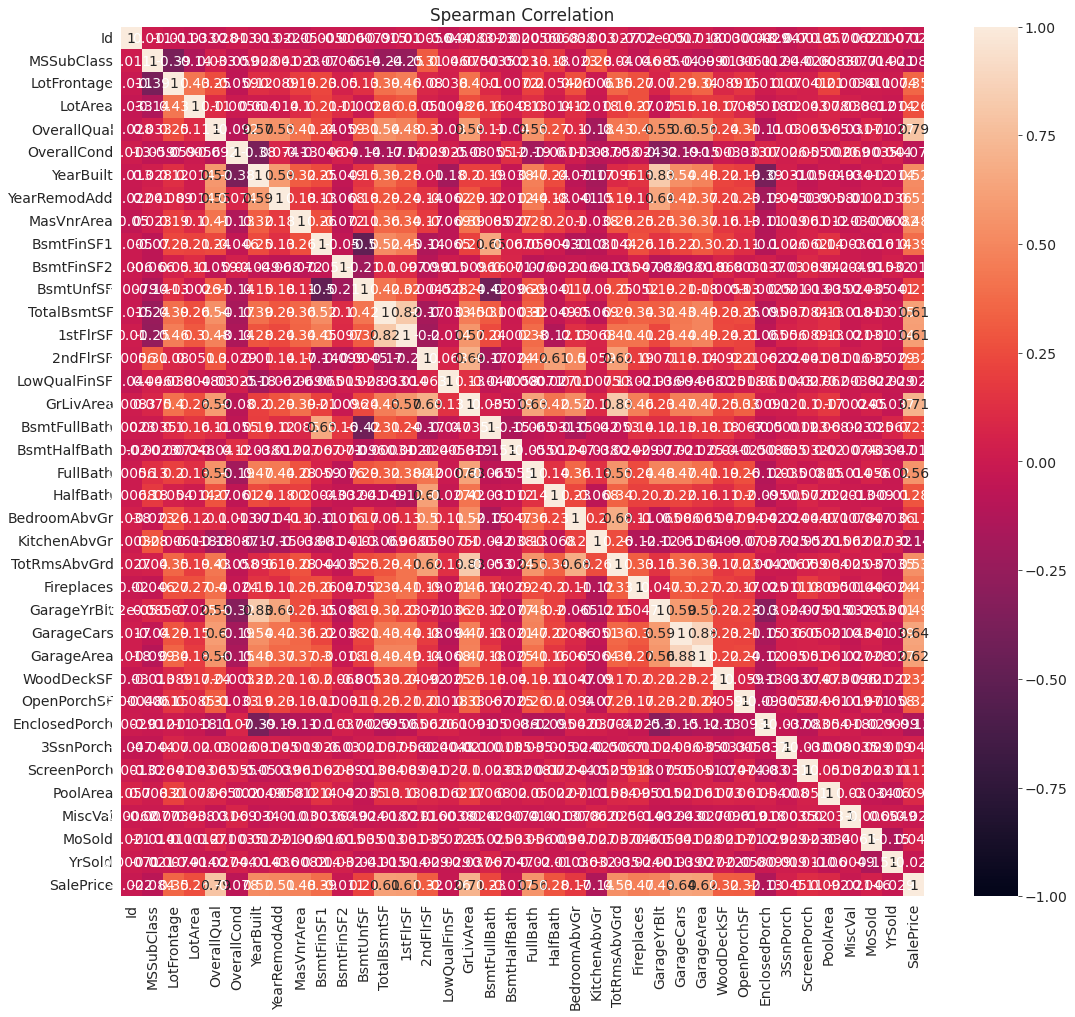

In [97]:
display_correlation(train_df)
pep8(_ih)

## Relationship between missing values columns

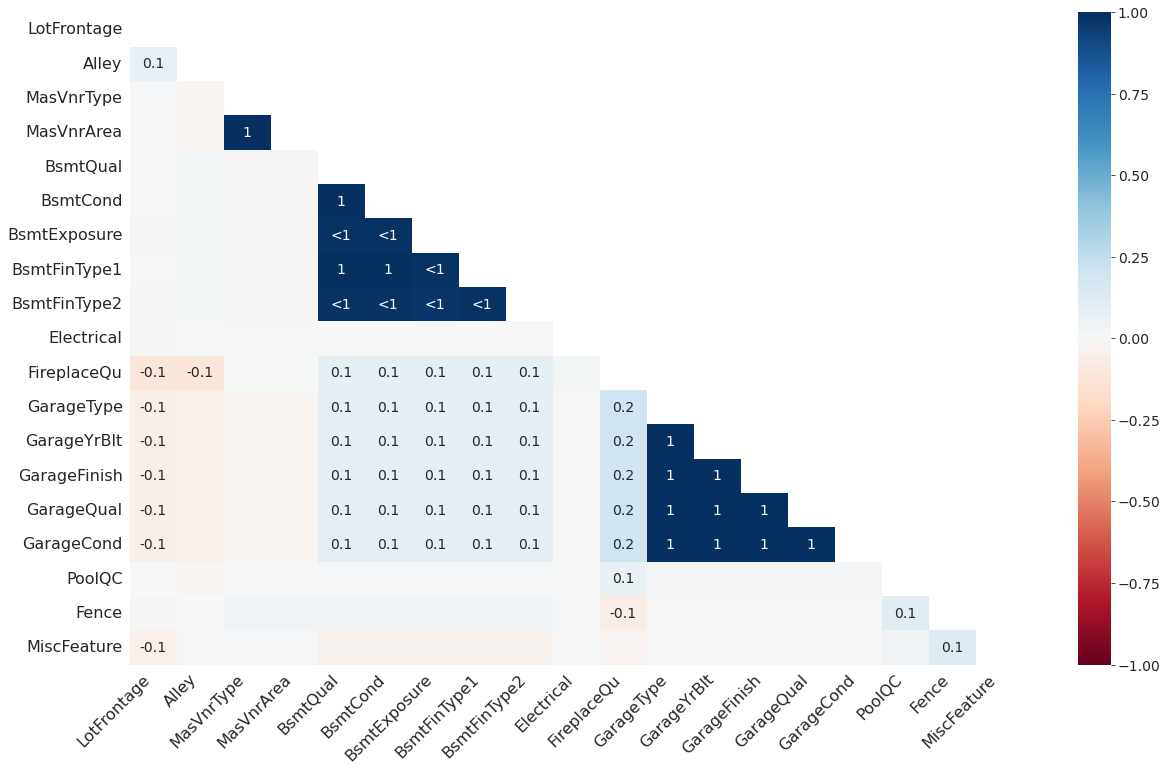

In [98]:
msno.heatmap(train_df)
pep8(_ih)

# Let's remove columns with more than 60% of missing values

## For Train data

In [99]:
missing_percent_train = (train_df.isnull().sum() / train_df.isnull().count())
missing_percent_train = missing_percent_train[missing_percent_train > 0.45]
missing_percent_train.sort_values(inplace=True)
print(missing_percent_train)

pep8(_ih)

FireplaceQu    0.472603
Fence          0.807534
Alley          0.937671
MiscFeature    0.963014
PoolQC         0.995205
dtype: float64



In [100]:
missing_index = missing_percent_train.index
np.array(missing_index)
pep8(_ih)

## There are 4 columns with percentage og missing values greater than the our thresold. We drop them from the dataset.

In [101]:
train_df = train_df.drop(columns=missing_index, axis=1)
train_df.head()

pep8(_ih)

## For Test data

In [102]:
missing_percent_test = (test_df.isnull().sum() / test_df.isnull().count())
missing_percent_test = missing_percent_test[missing_percent_test > 0.45]
missing_percent_test.sort_values(inplace=True)
print(missing_percent_test)

pep8(_ih)

FireplaceQu    0.500343
Fence          0.801234
Alley          0.926662
MiscFeature    0.965045
PoolQC         0.997944
dtype: float64



In [103]:
missing_index = missing_percent_test.index
np.array(missing_index)
pep8(_ih)

## There are 4 columns with percentage og missing values greater than the our thresold. We drop them from the dataset.

In [104]:
test_df = test_df.drop(columns=missing_index, axis=1)
test_df.head()

pep8(_ih)

## After removing columns with more than 60% of missing values

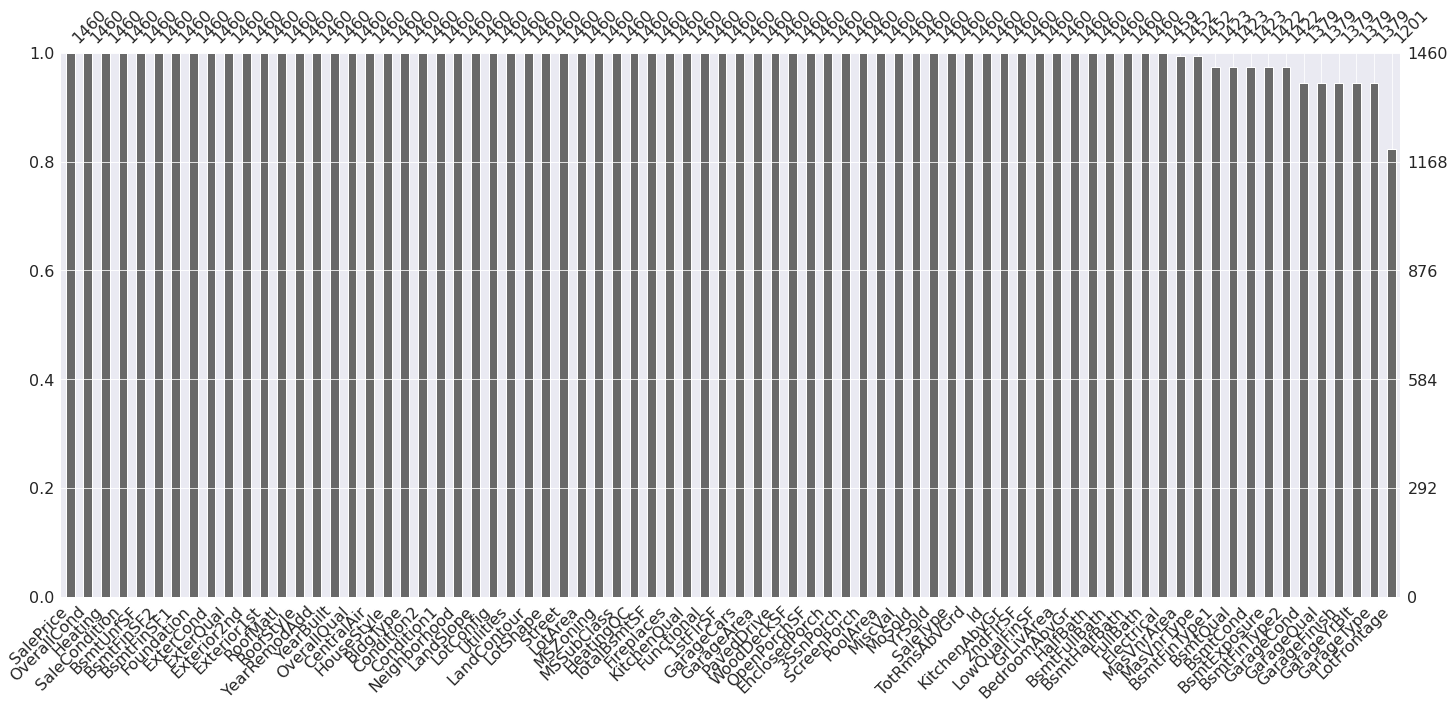

In [105]:
msno.bar(train_df, labels=True, sort="descending",)
pep8(_ih)

## Let's cleanup the reste of missing values

In [106]:
missing = train_df.isnull().sum()
missing = missing[missing > 0]
print(missing)
pep8(_ih)

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64



In [107]:
missing_col = ["LotFrontage", "MasVnrType", "MasVnrArea", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "Electrical", "GarageType", "GarageYrBlt", "GarageFinish", "GarageQual", "GarageCond"]
pep8(_ih)

cell_content.py:1:80: E501 line too long (216 > 79 characters)



In [108]:
train_df[missing_col].info()
pep8(_ih)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   MasVnrType    1452 non-null   object 
 2   MasVnrArea    1452 non-null   float64
 3   BsmtQual      1423 non-null   object 
 4   BsmtCond      1423 non-null   object 
 5   BsmtExposure  1422 non-null   object 
 6   BsmtFinType1  1423 non-null   object 
 7   BsmtFinType2  1422 non-null   object 
 8   Electrical    1459 non-null   object 
 9   GarageType    1379 non-null   object 
 10  GarageYrBlt   1379 non-null   float64
 11  GarageFinish  1379 non-null   object 
 12  GarageQual    1379 non-null   object 
 13  GarageCond    1379 non-null   object 
dtypes: float64(3), object(11)
memory usage: 159.8+ KB



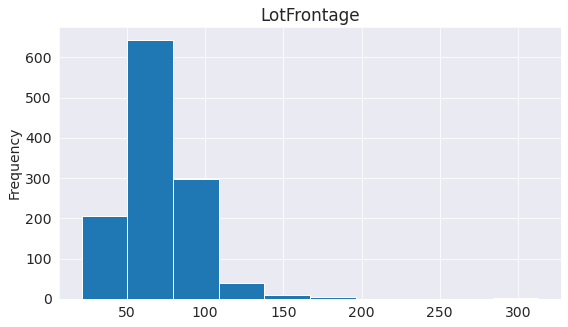

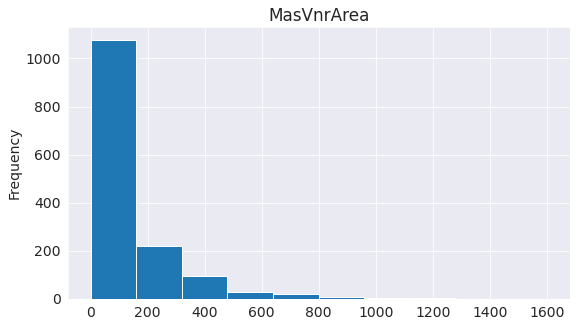

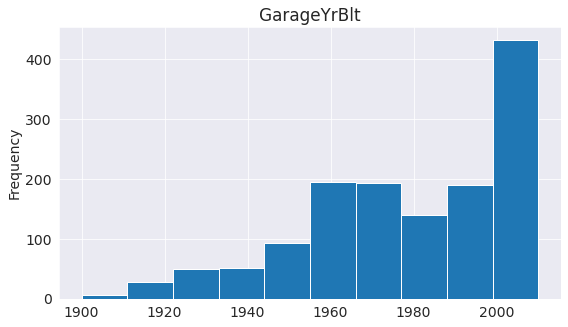

cell_content.py:4:1: W293 blank line contains whitespace



In [109]:
for col in ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']:
    train_df[col].plot(kind='hist', bins=10, title=col)
    plt.show()
    
pep8(_ih)

## For these numerical columns i am going to use mean imputation for missing values

## Train data

In [110]:
for col in train_df.columns:
    if train_df[col].dtype != 'object':
        mean_val = train_df[col].mean()
        train_df[col].fillna(mean_val, inplace=True)

pep8(_ih)

## Test data

In [111]:
for col in test_df.columns:
    if test_df[col].dtype != 'object':
        mean_val = test_df[col].mean()
        test_df[col].fillna(mean_val, inplace=True)
        
pep8(_ih)

cell_content.py:5:1: W293 blank line contains whitespace



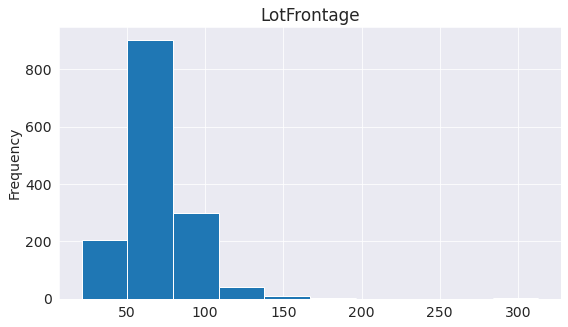

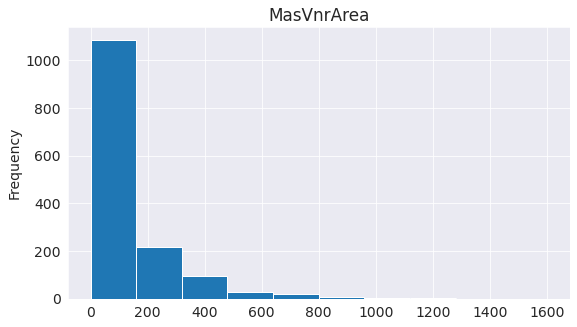

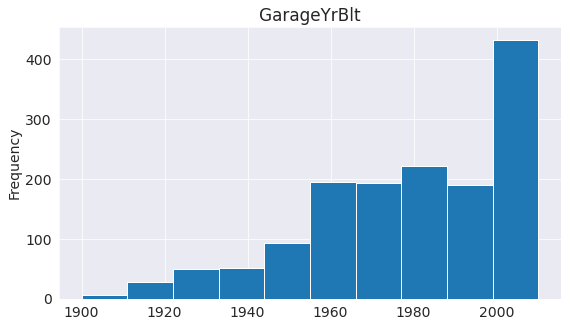

cell_content.py:4:1: W293 blank line contains whitespace



In [112]:
for col in ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']:
    train_df[col].plot(kind='hist', bins=10, title=col)
    plt.show()
    
pep8(_ih)

## For categorical columns i'll replace replace na values with Unknow

## Taining data

In [113]:
for col in train_df.columns:
    if train_df[col].dtype == 'object':
        train_df[col].fillna('Unknown', inplace=True)
        
pep8(_ih)

cell_content.py:4:1: W293 blank line contains whitespace



## Test data

In [114]:
for col in test_df.columns:
    if test_df[col].dtype == 'object':
        test_df[col].fillna('Unknown', inplace=True)
        
pep8(_ih)

cell_content.py:4:1: W293 blank line contains whitespace



In [115]:
train_df.isnull().sum().sort_values(ascending=False)
pep8(_ih)

In [116]:
test_df.isnull().sum().sort_values(ascending=False)
pep8(_ih)

## Let's analyse the independance between categorical variables and SalesPrice 

In [117]:
def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = categorical_cols
    pvals = []
    for c in categorical_cols:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePrice'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

pep8(_ih)

cell_content.py:15:1: E305 expected 2 blank lines after class or function definition, found 1



In [118]:
numerical_cols = [col for col in train_df.columns if train_df.dtypes[col] != 'object']
numerical_cols

pep8(_ih)

cell_content.py:1:80: E501 line too long (86 > 79 characters)



In [119]:
categorical_cols = [col for col in train_df.columns if train_df.dtypes[col] == 'object']
categorical_cols

pep8(_ih)

cell_content.py:1:80: E501 line too long (88 > 79 characters)



cell_content.py:3:80: E501 line too long (93 > 79 characters)



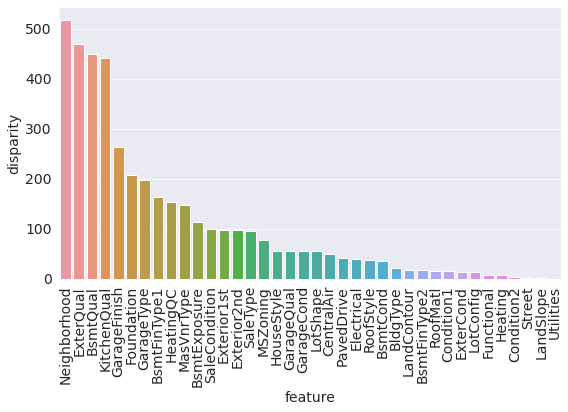

In [120]:
anv_salesprice = anova(train_df)
anv_salesprice['disparity'] = np.log(1. / anv_salesprice['pval'].values)
sns.barplot(data=anv_salesprice[anv_salesprice.disparity >= 0.5], x='feature', y='disparity')
x = plt.xticks(rotation=90)

anv_salesprice[anv_salesprice.pval <= 0.05]
pep8(_ih)

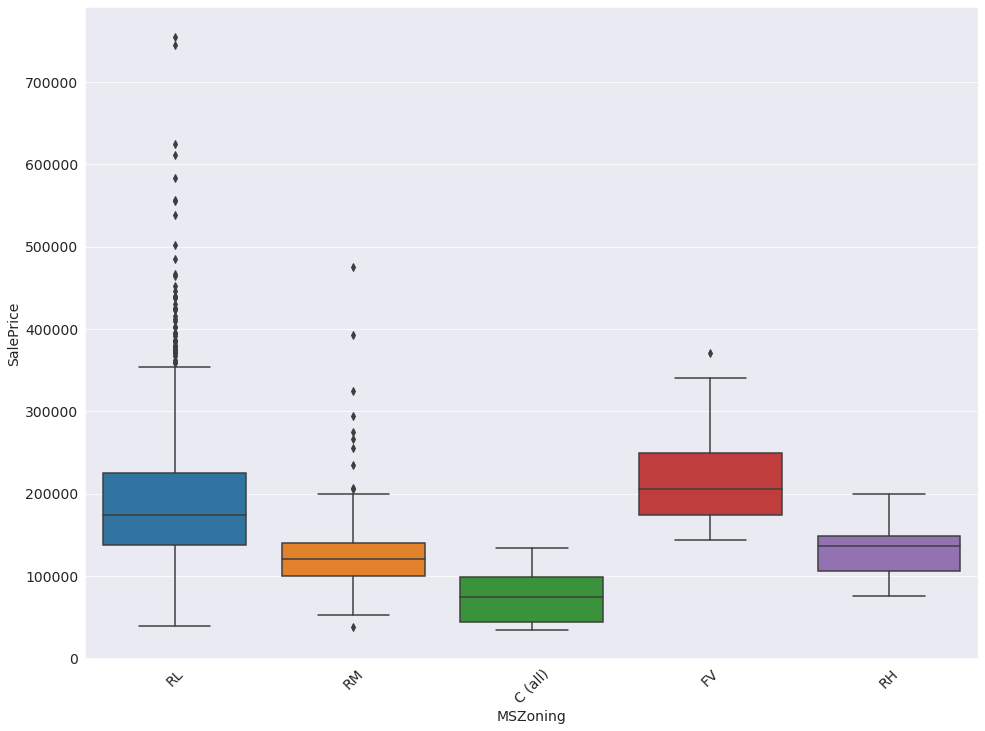

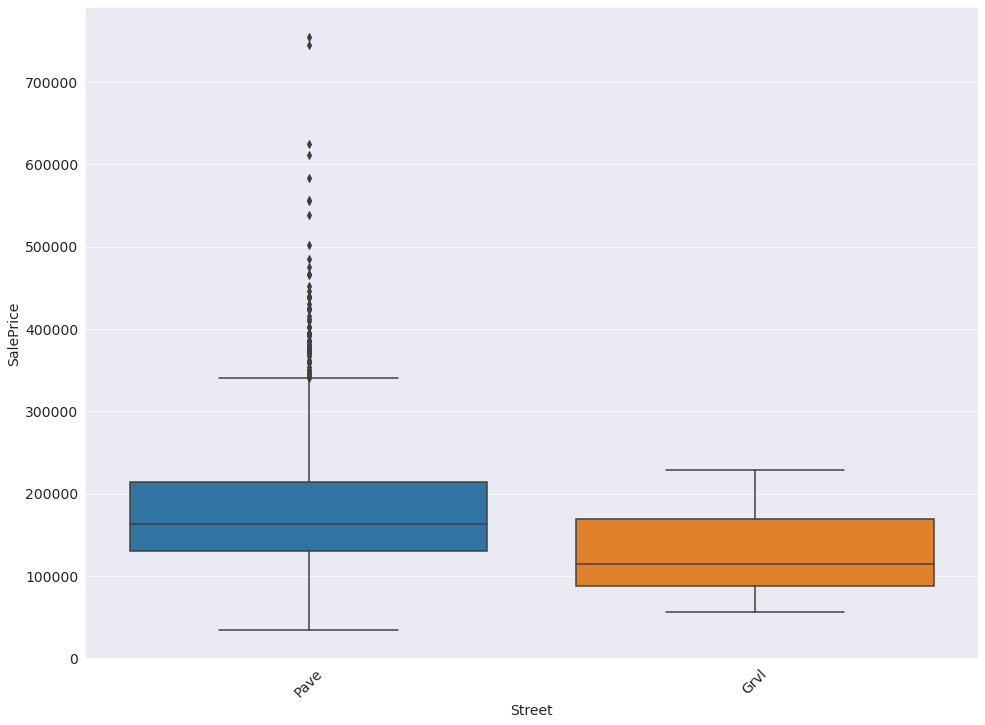

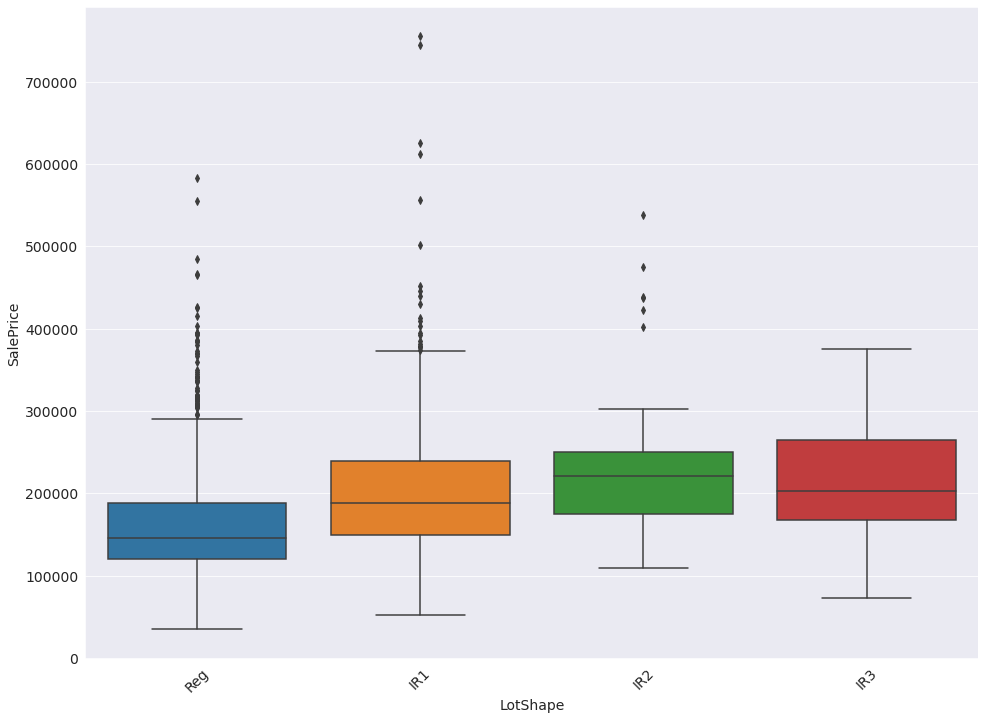

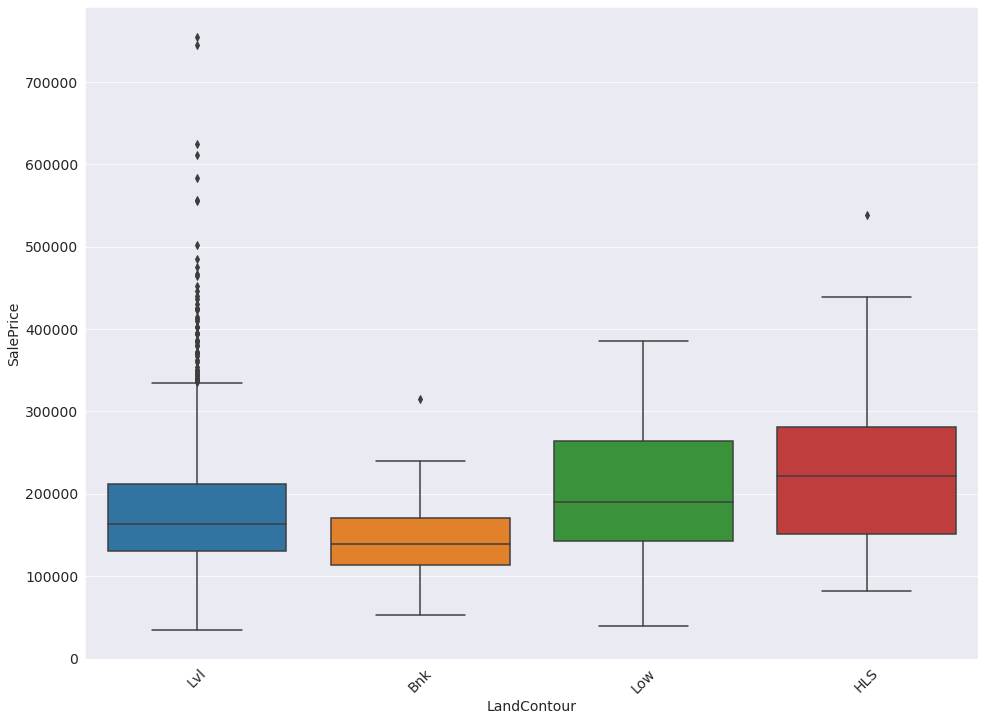

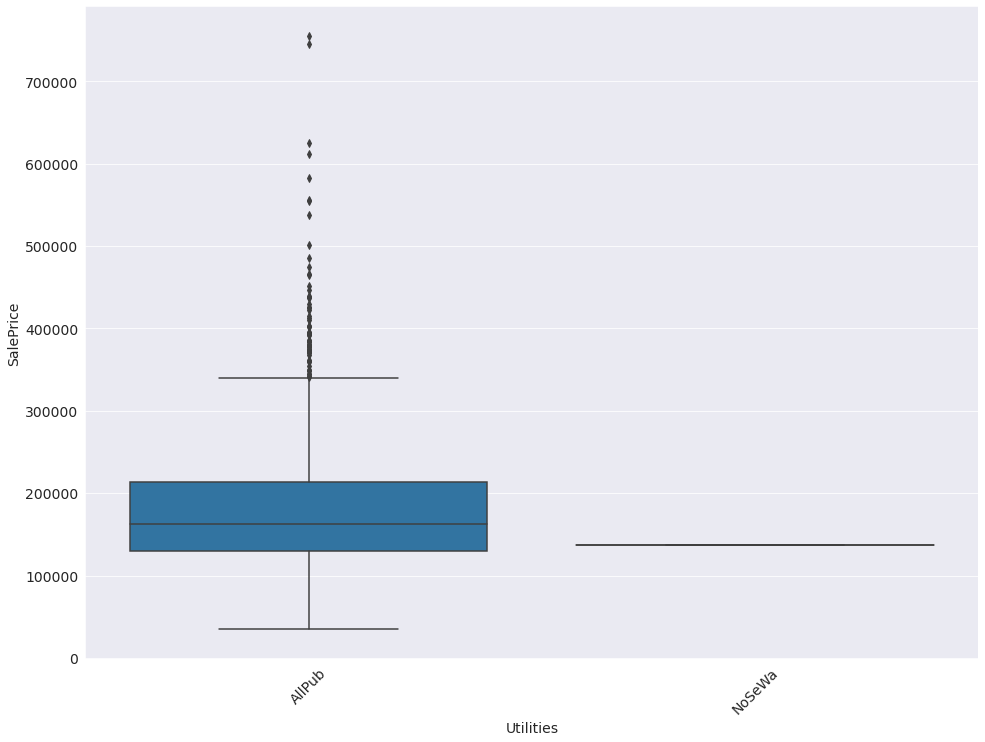

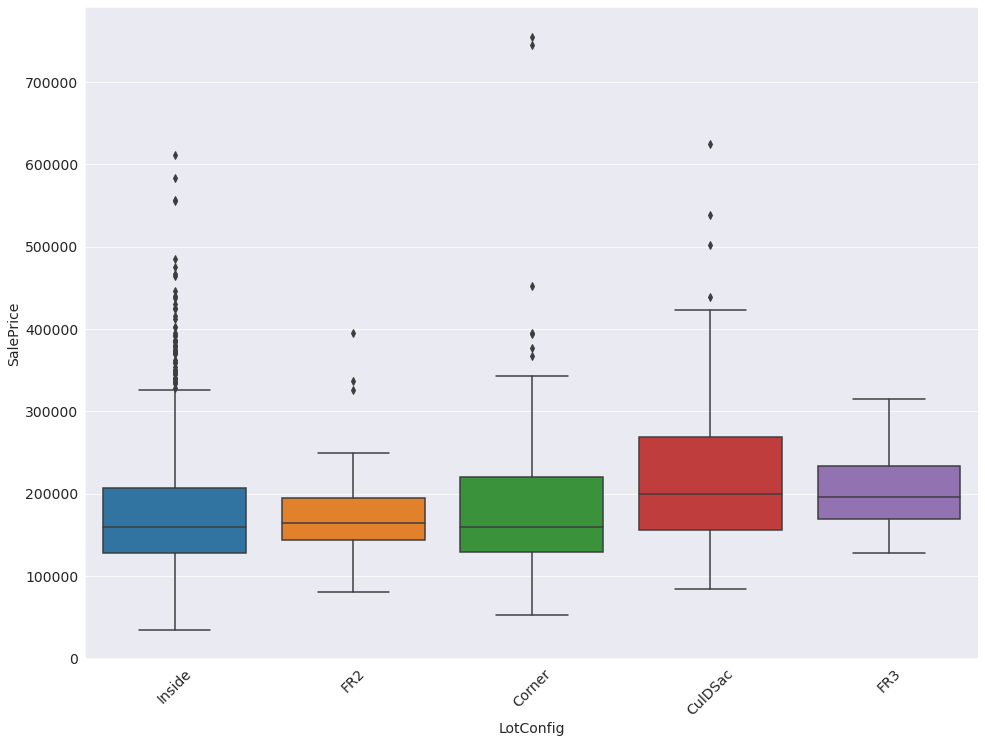

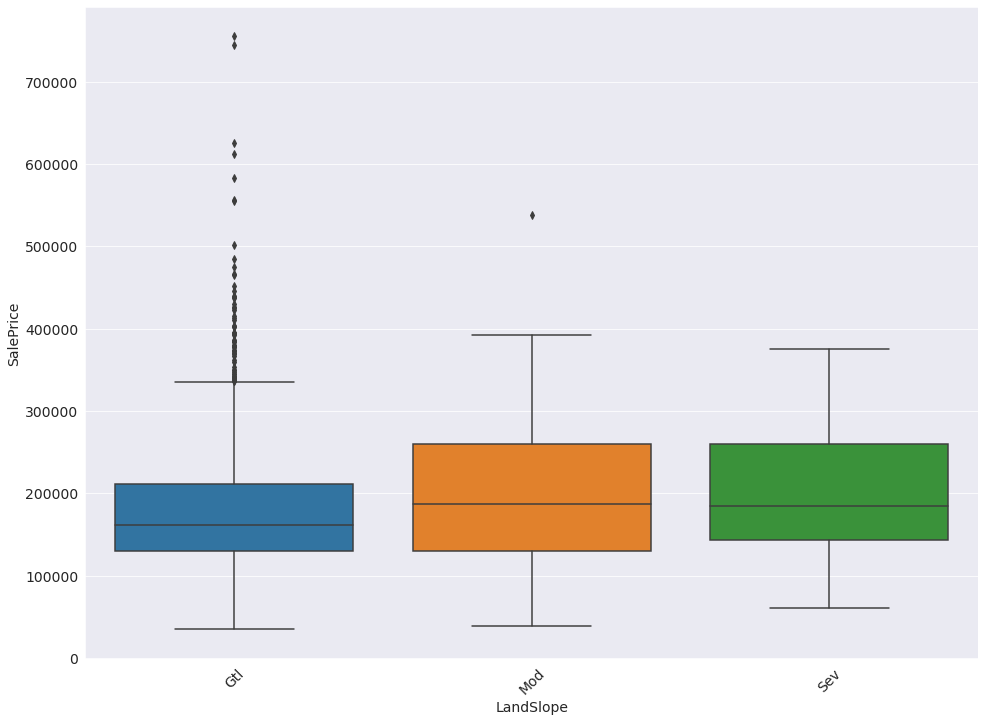

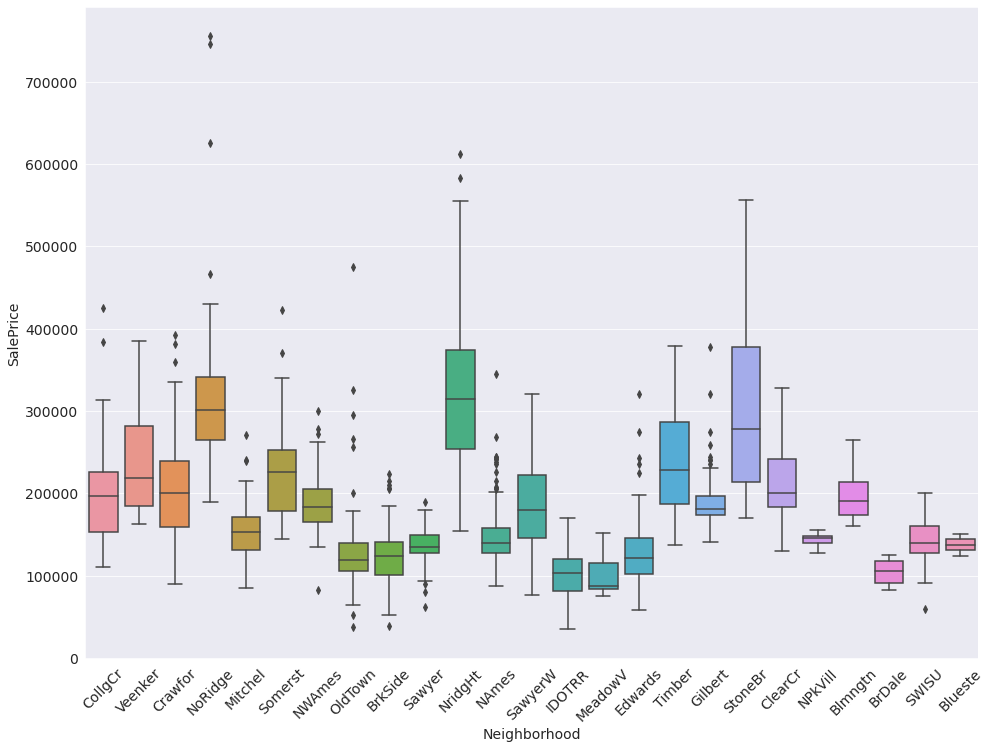

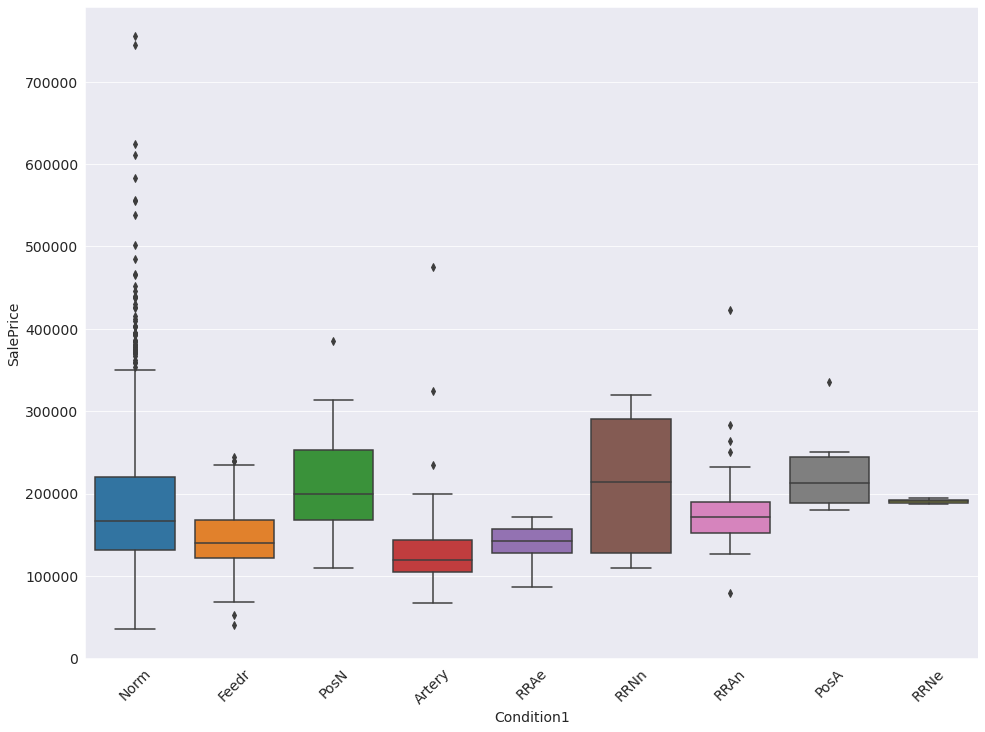

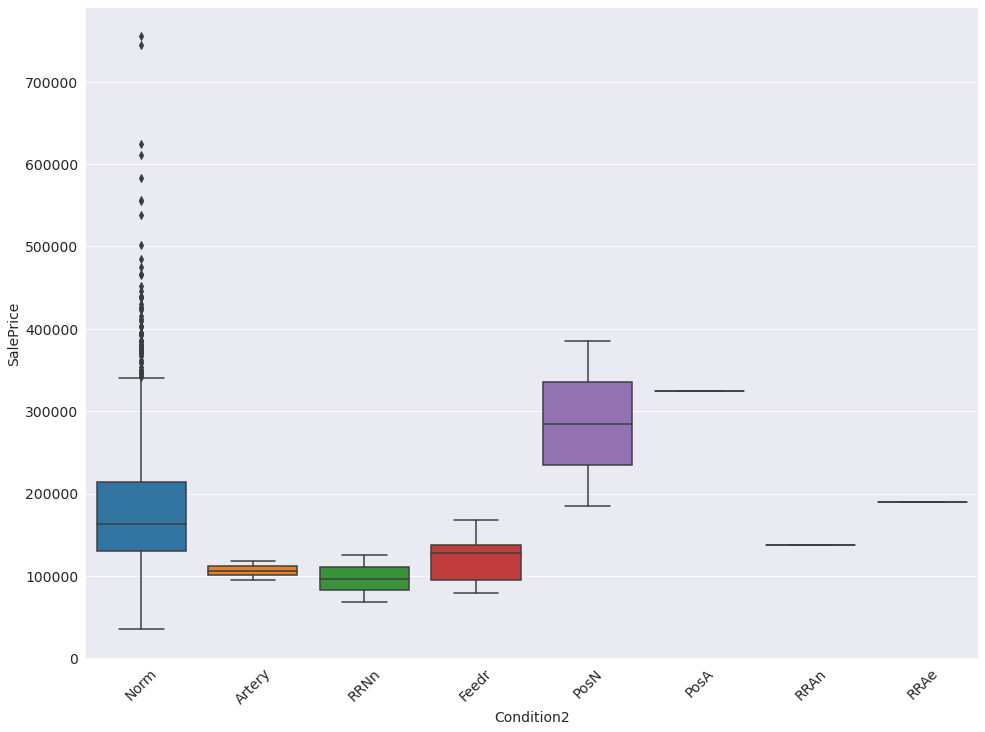

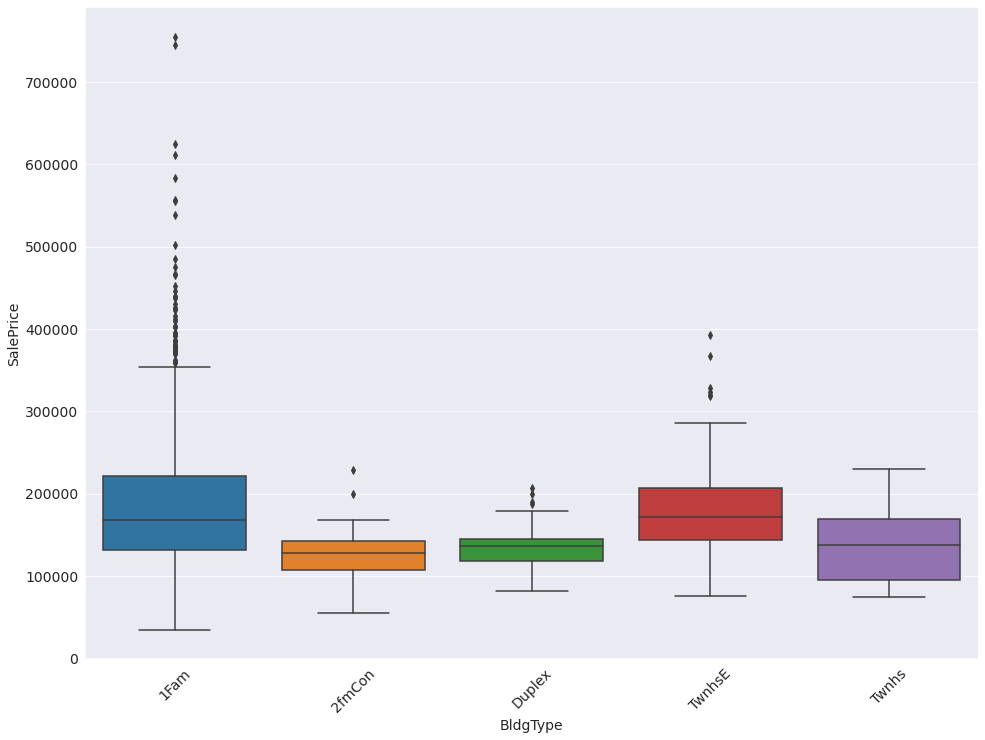

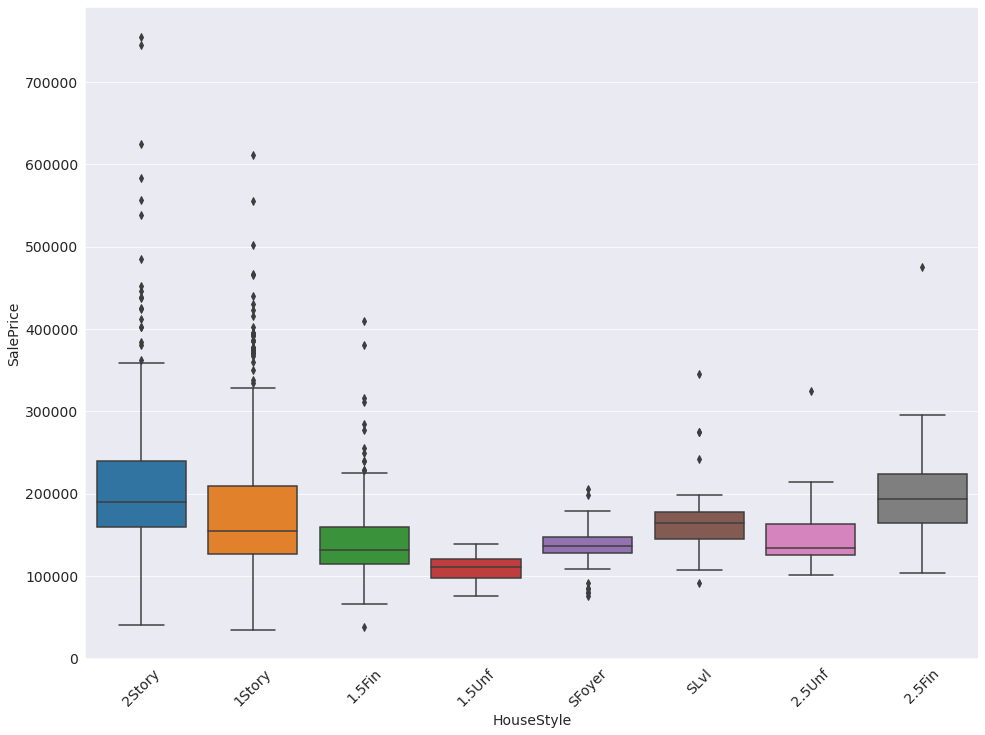

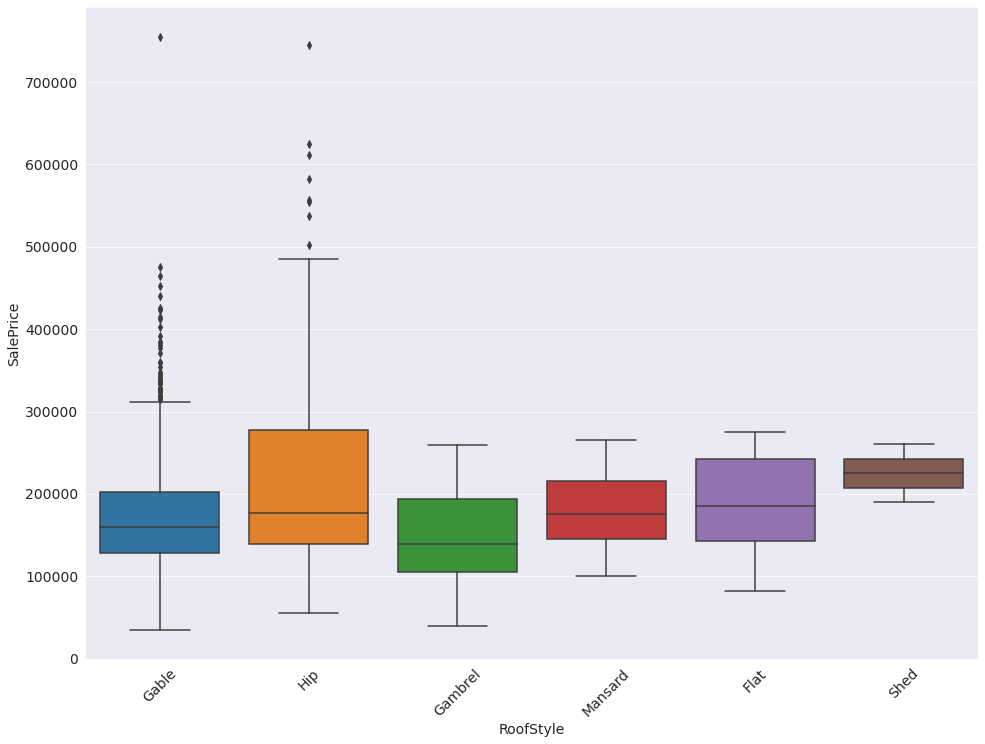

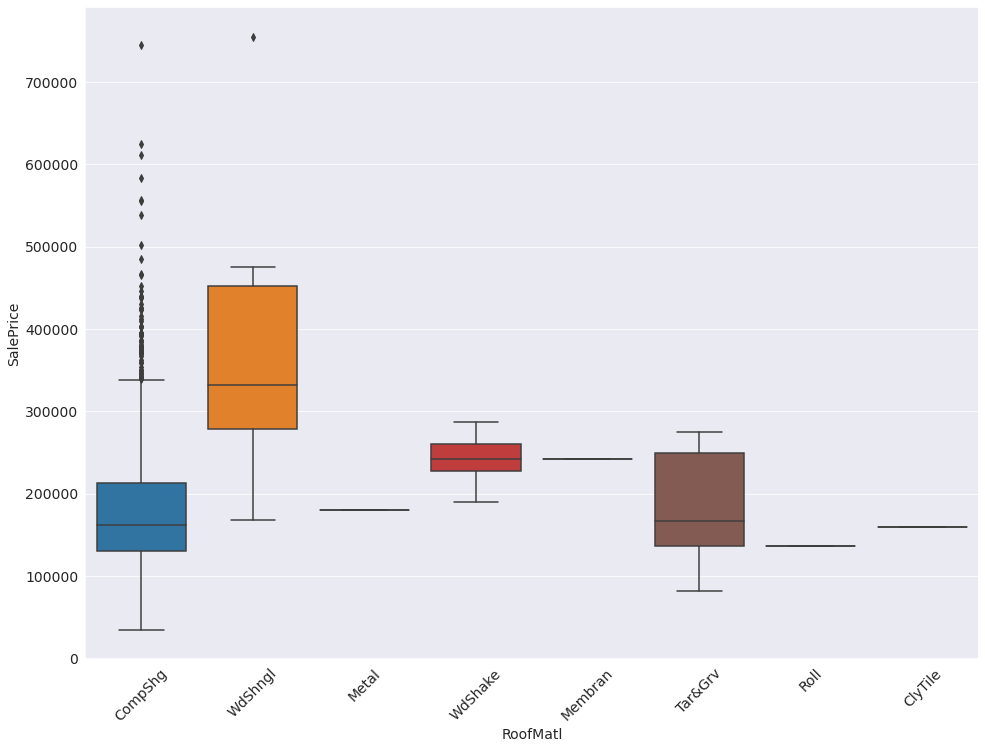

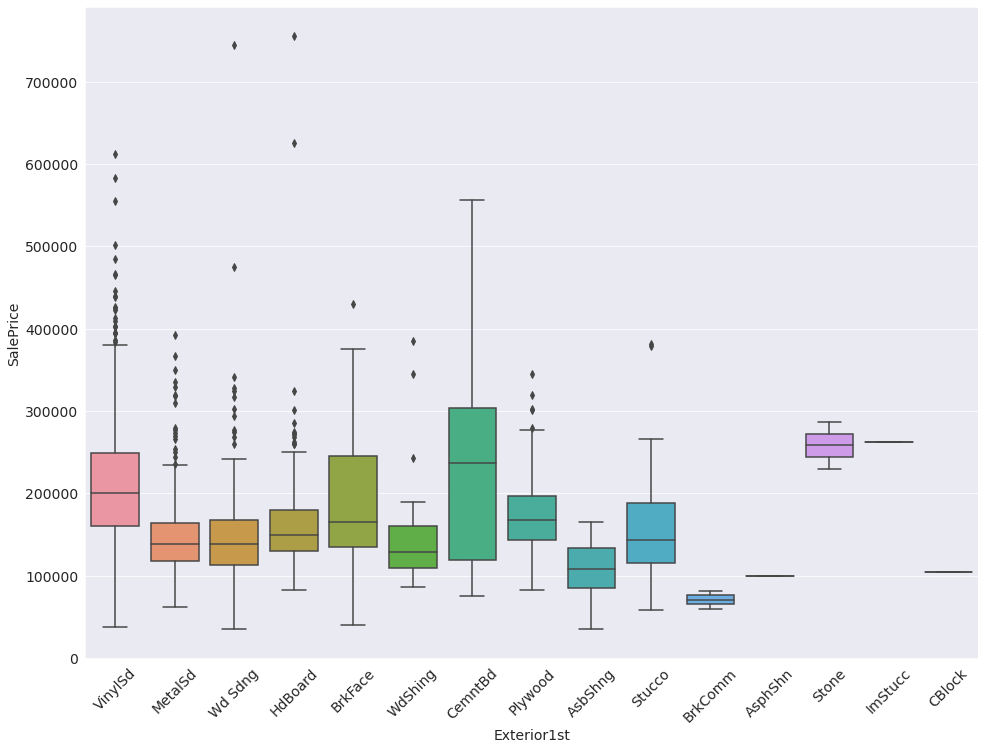

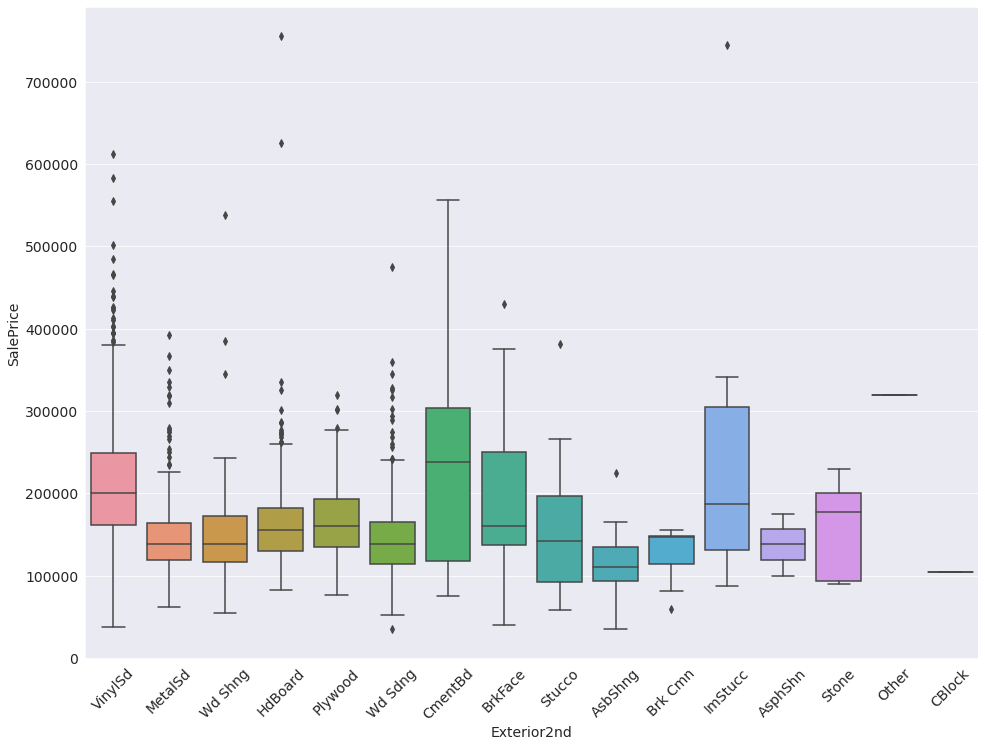

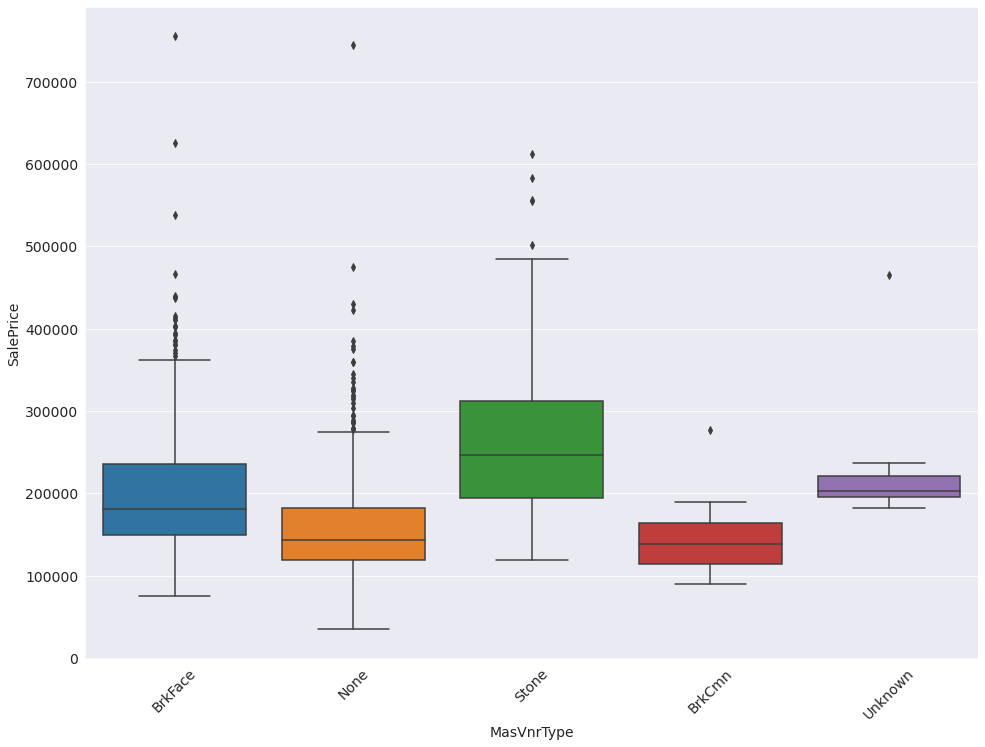

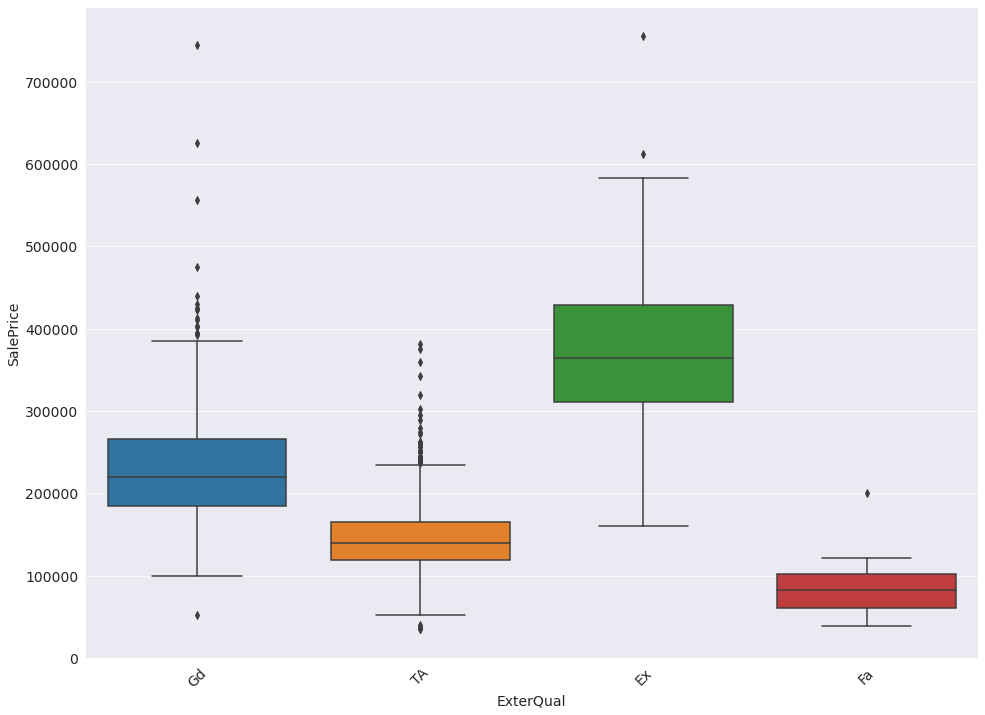

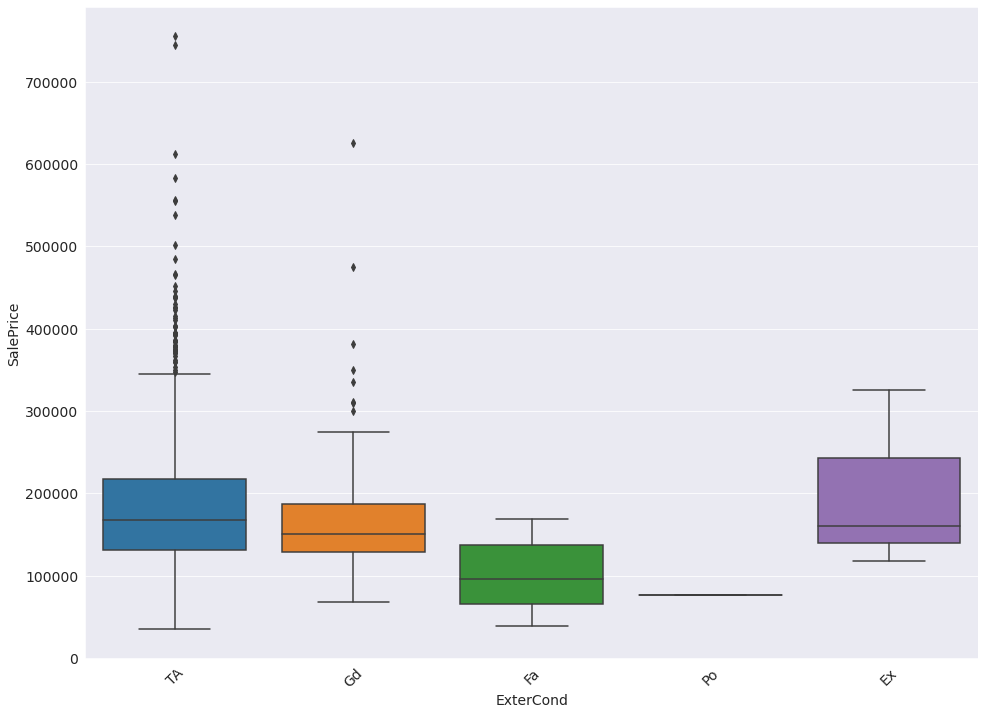

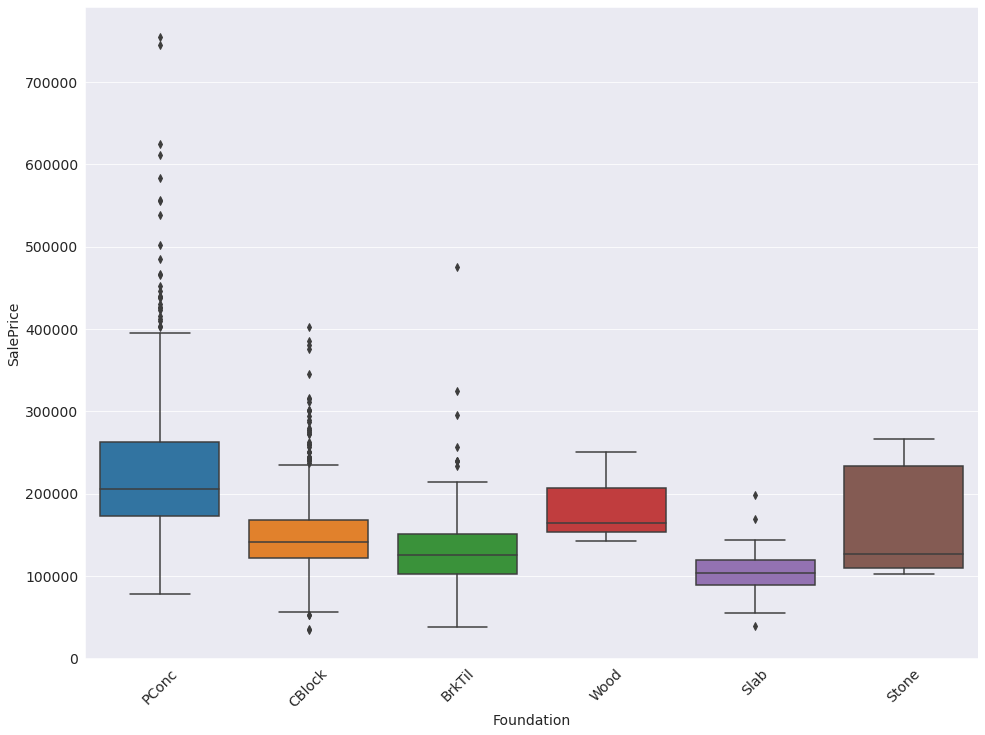

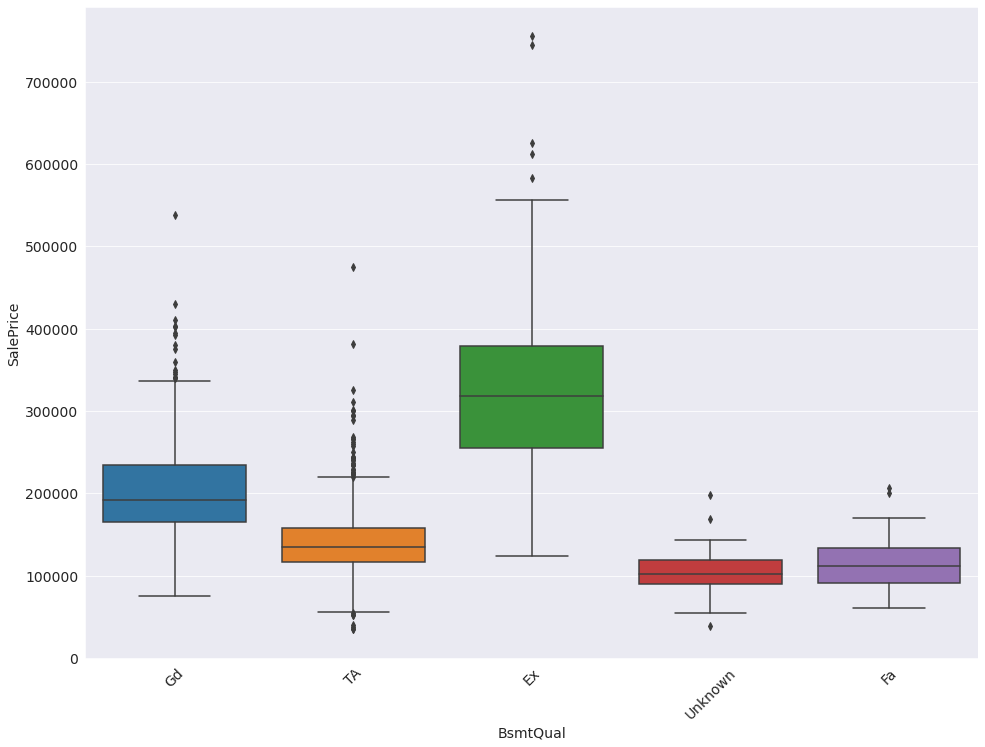

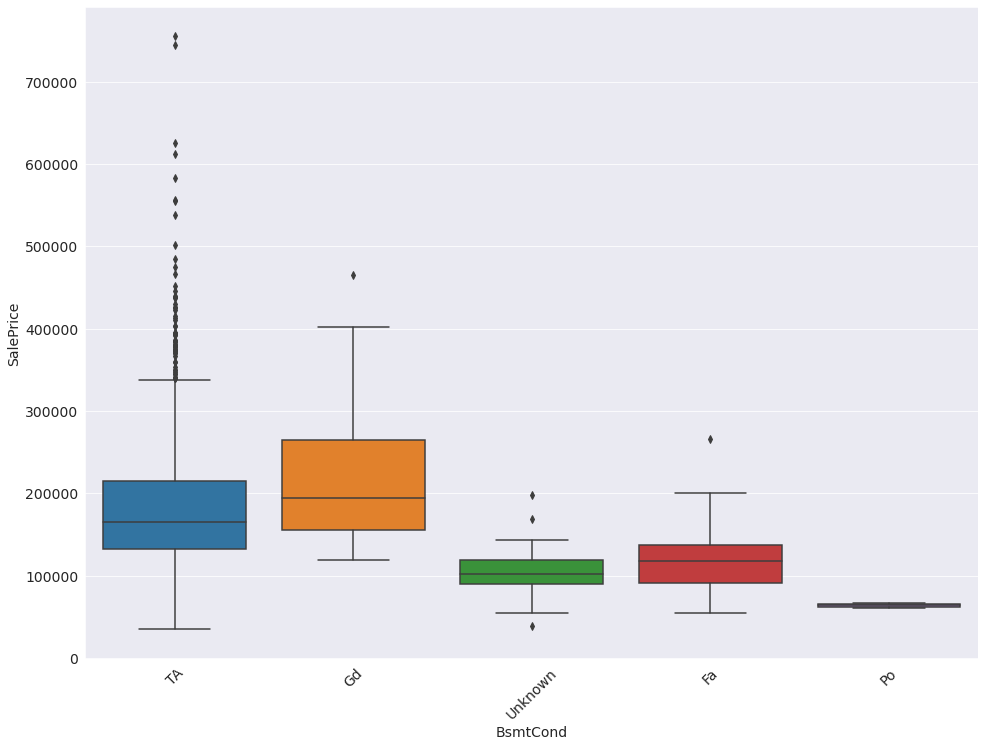

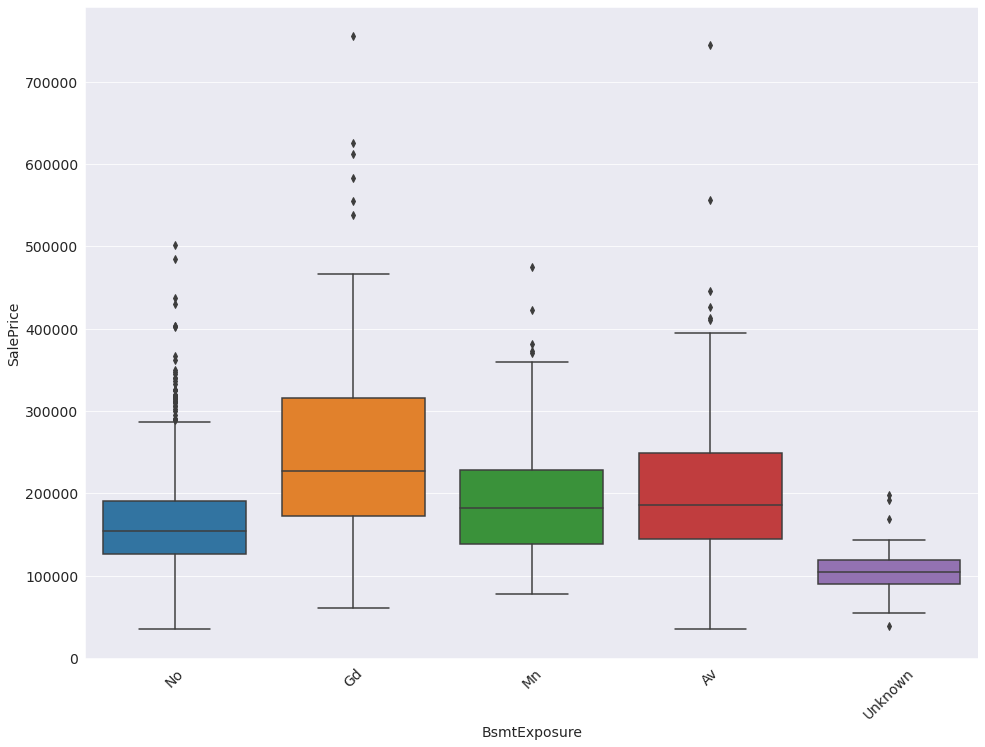

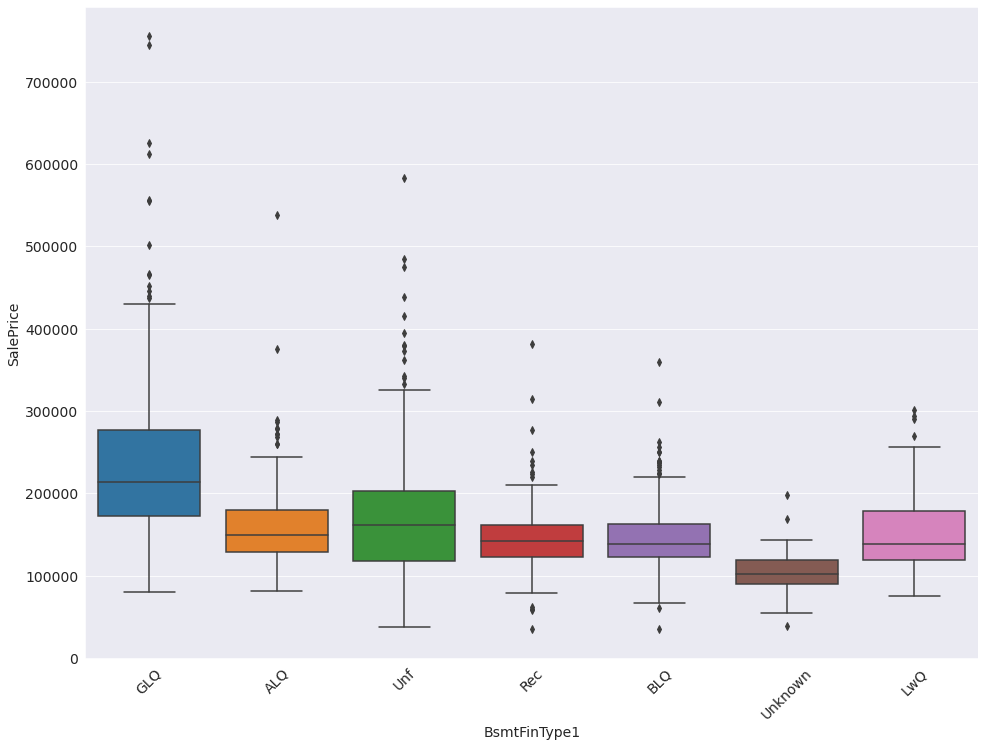

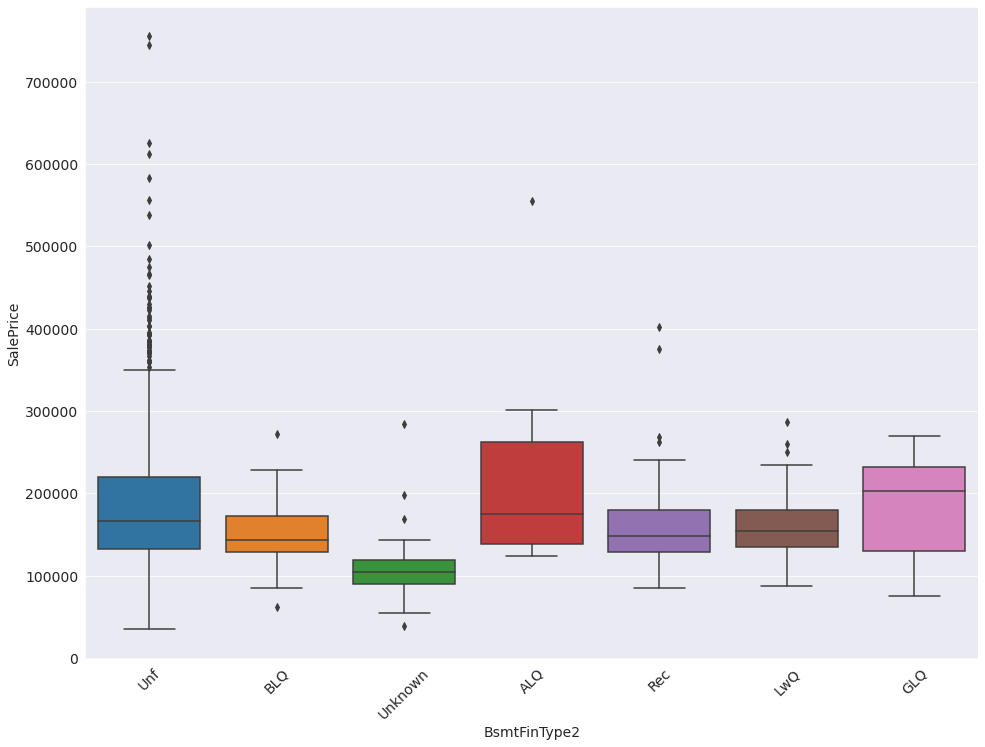

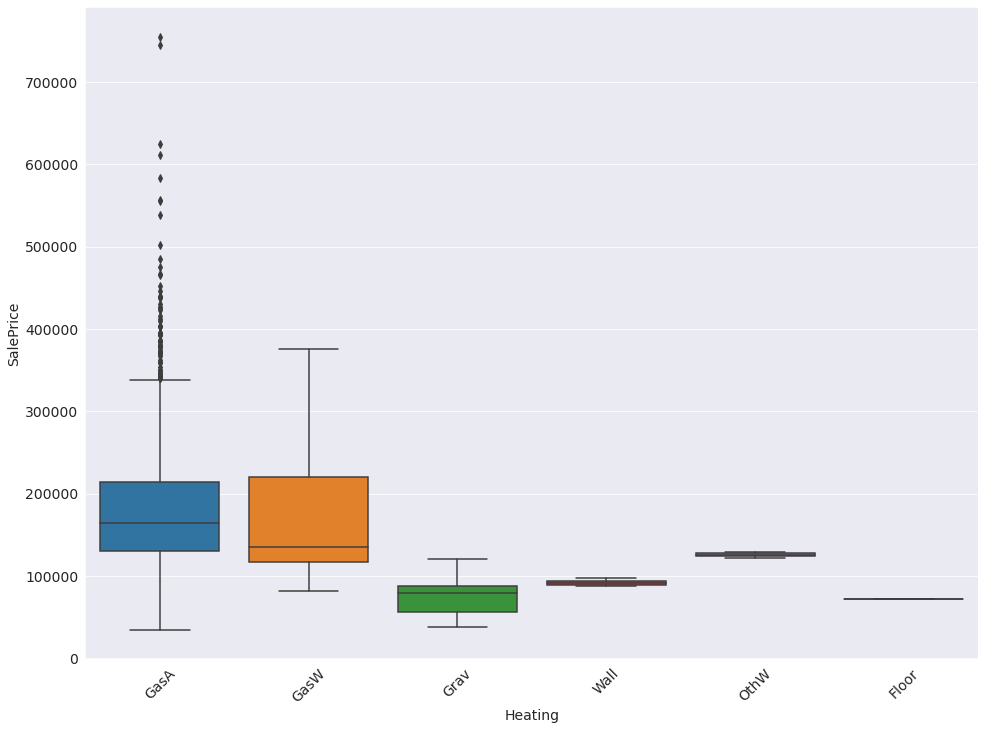

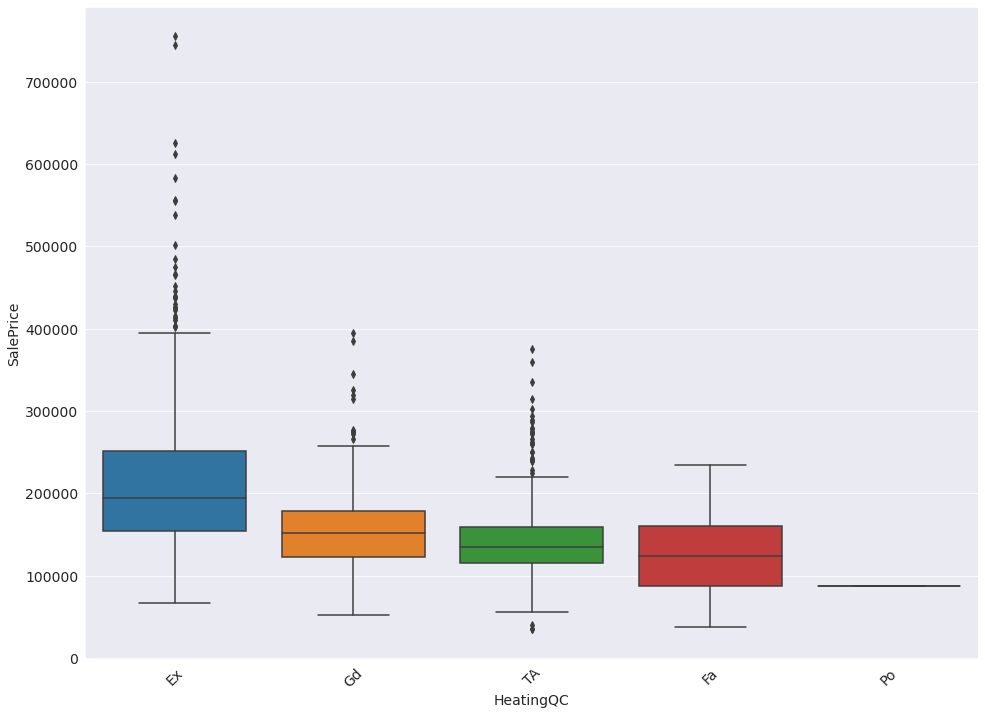

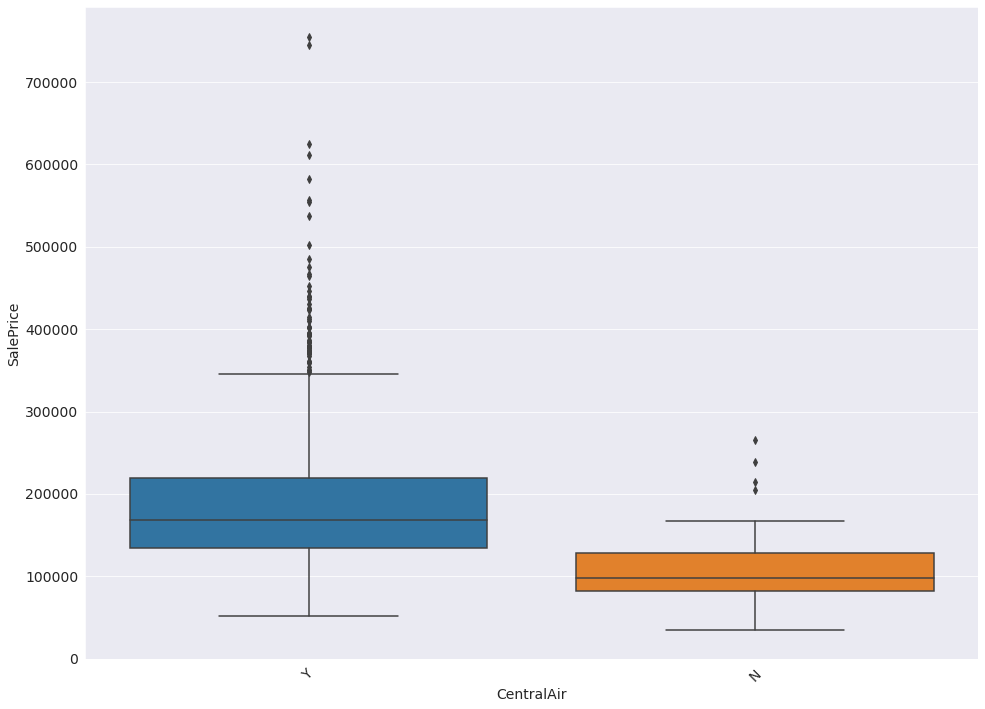

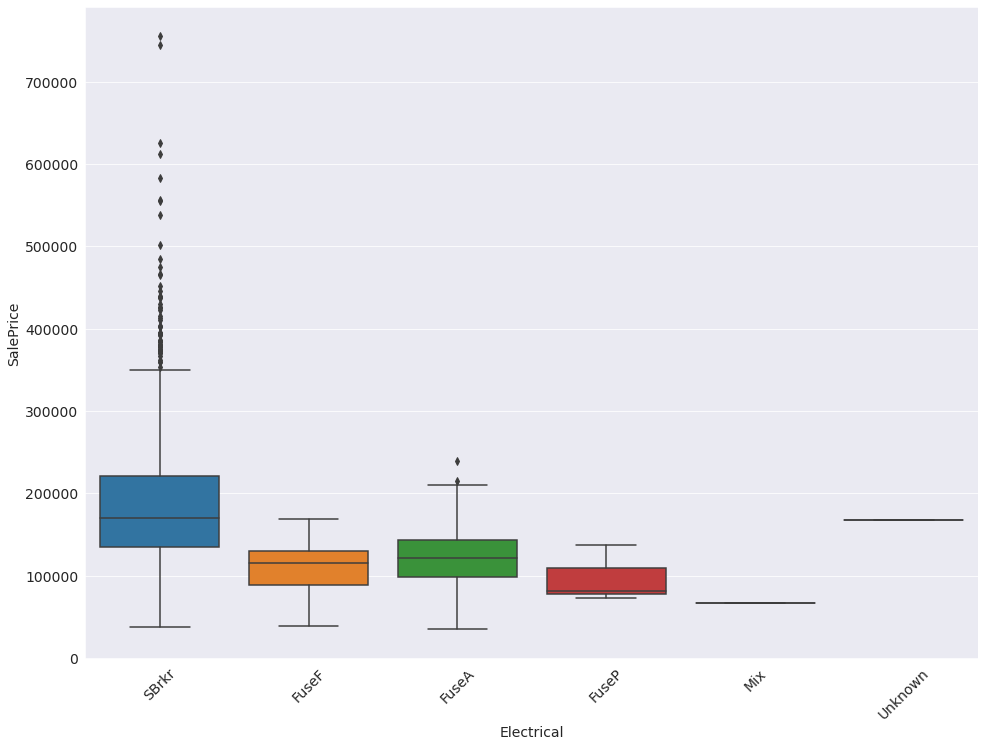

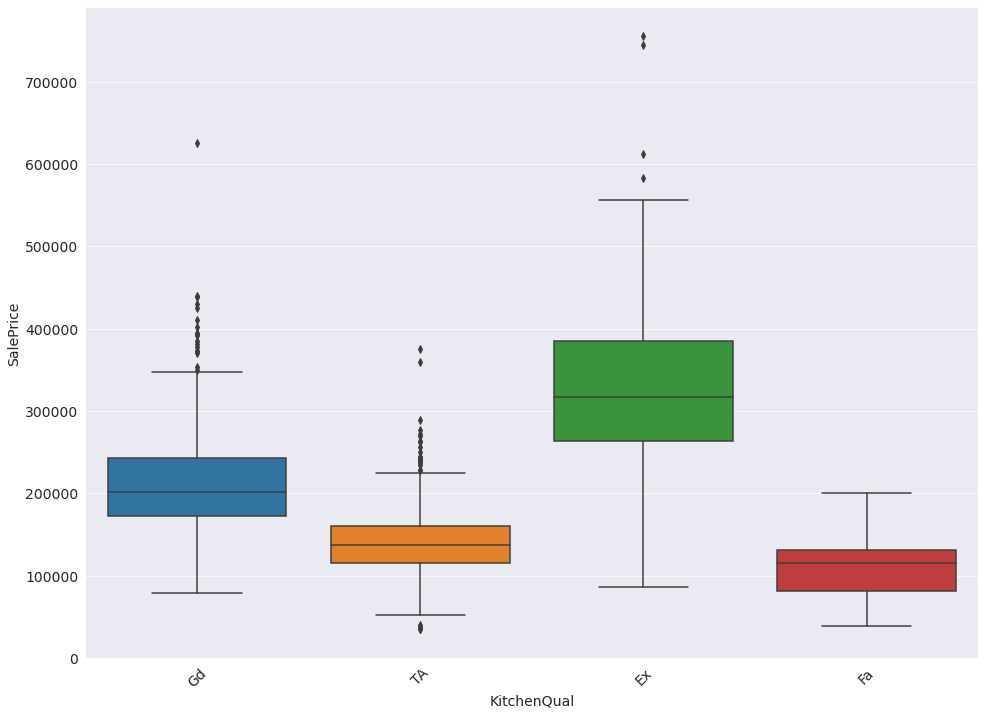

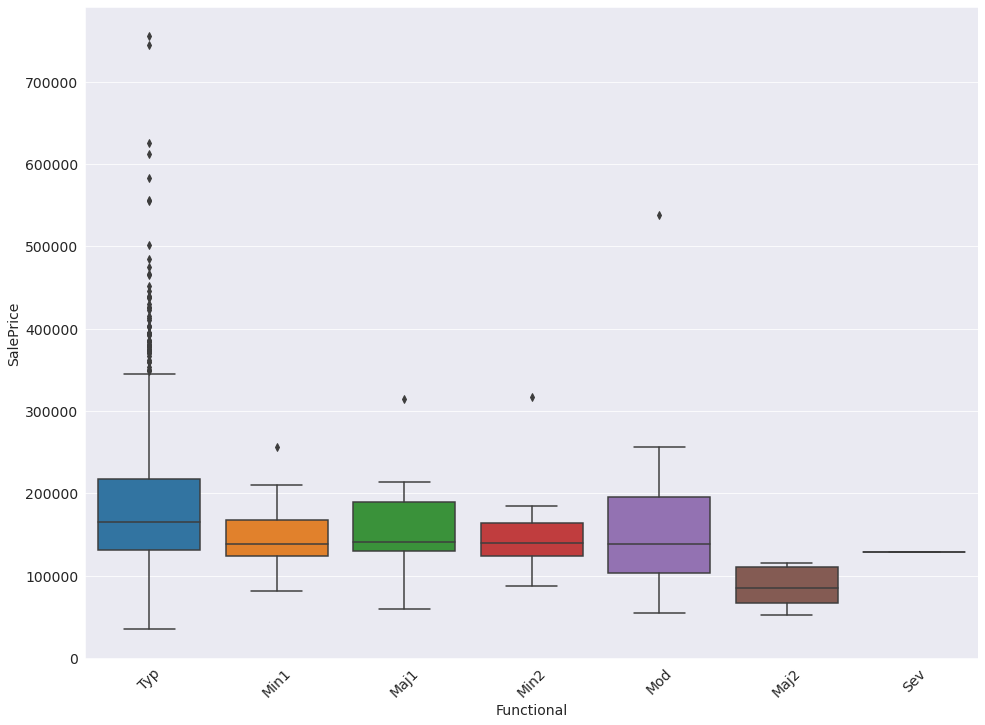

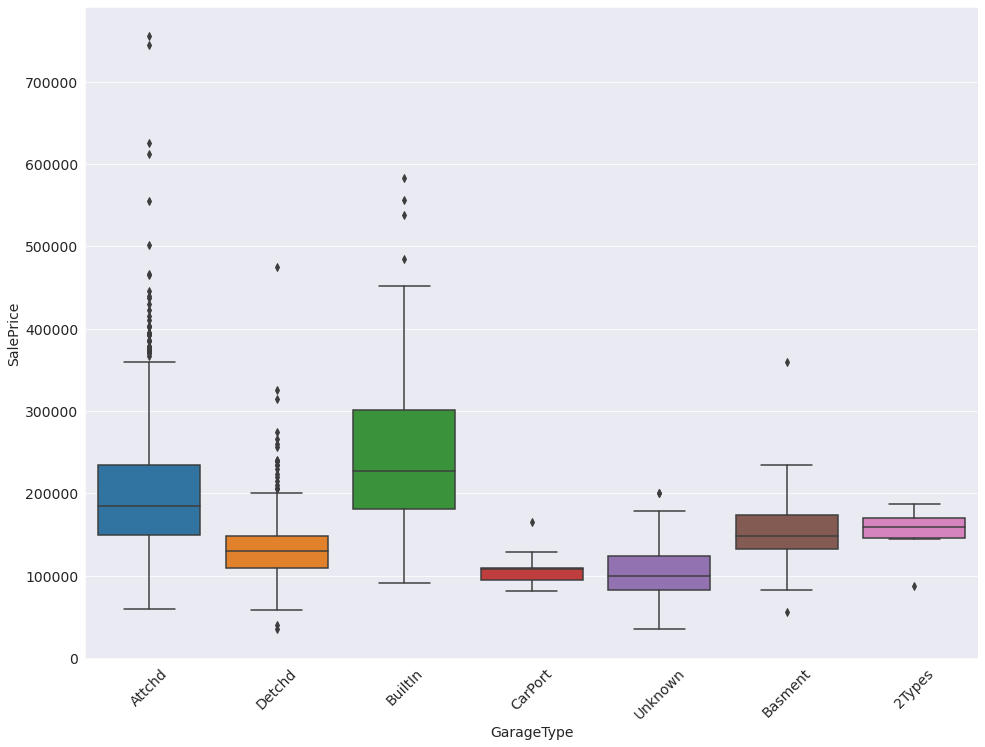

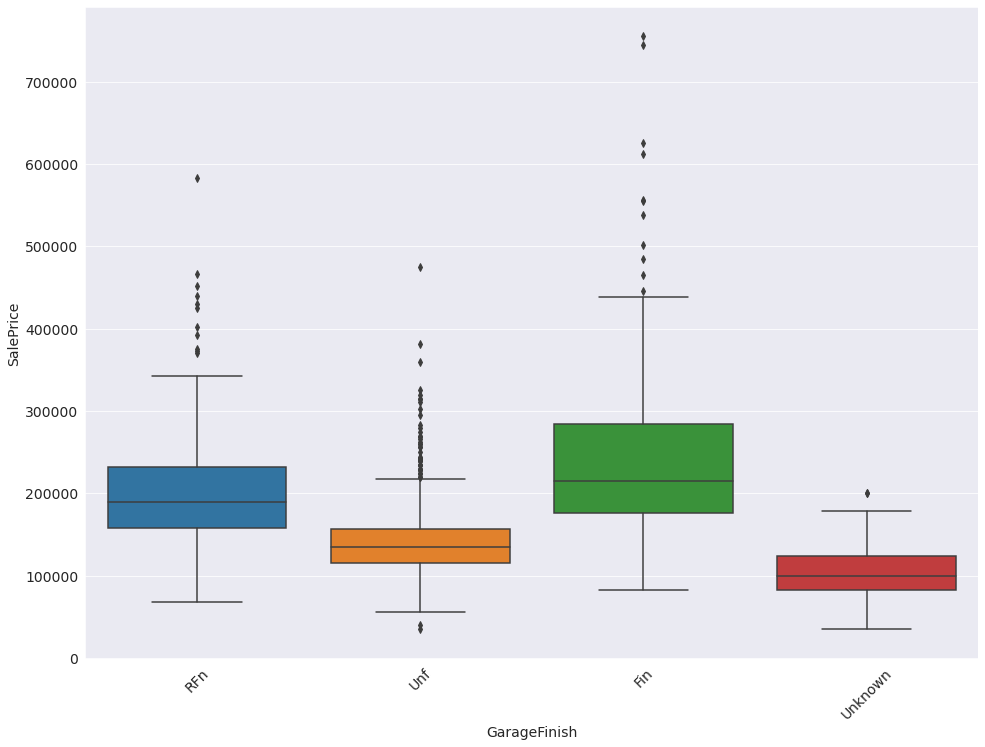

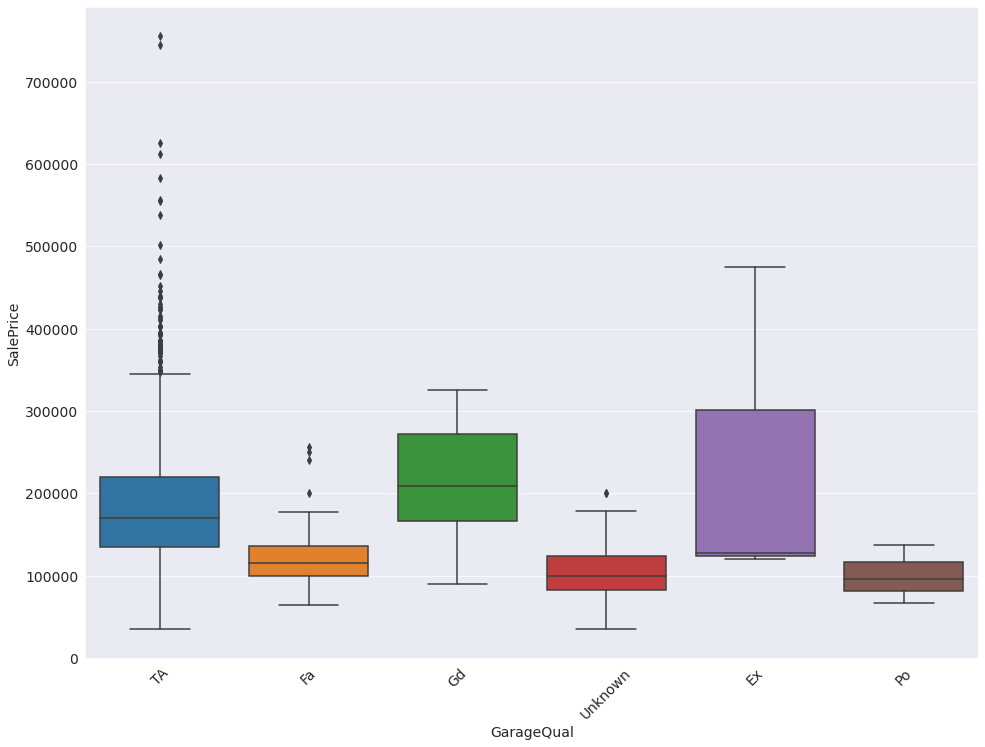

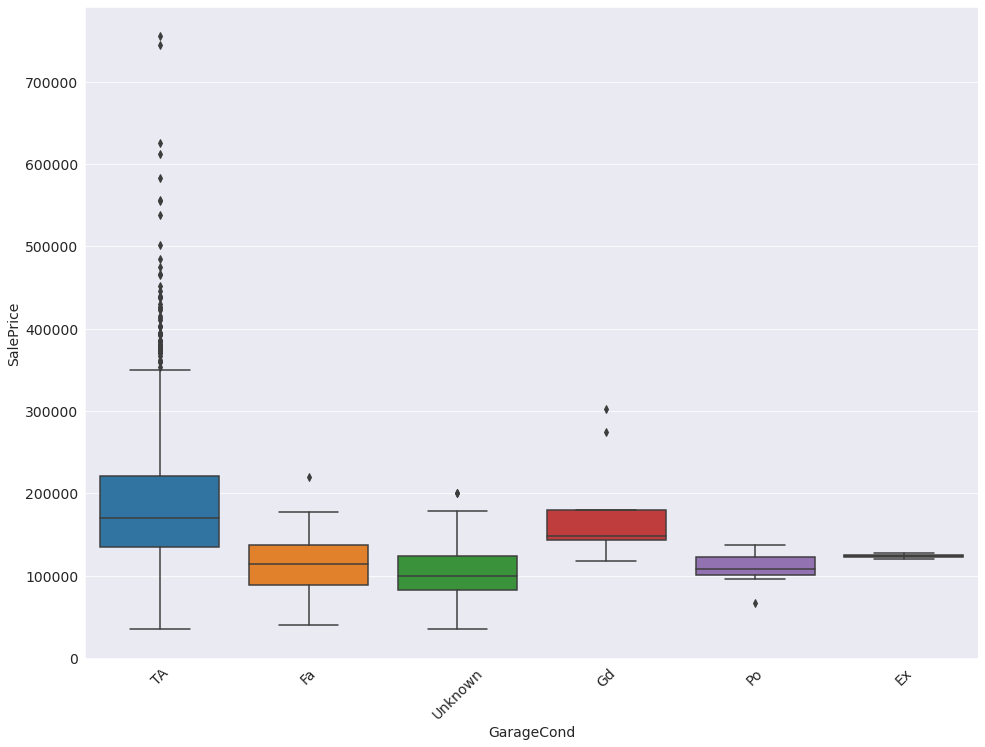

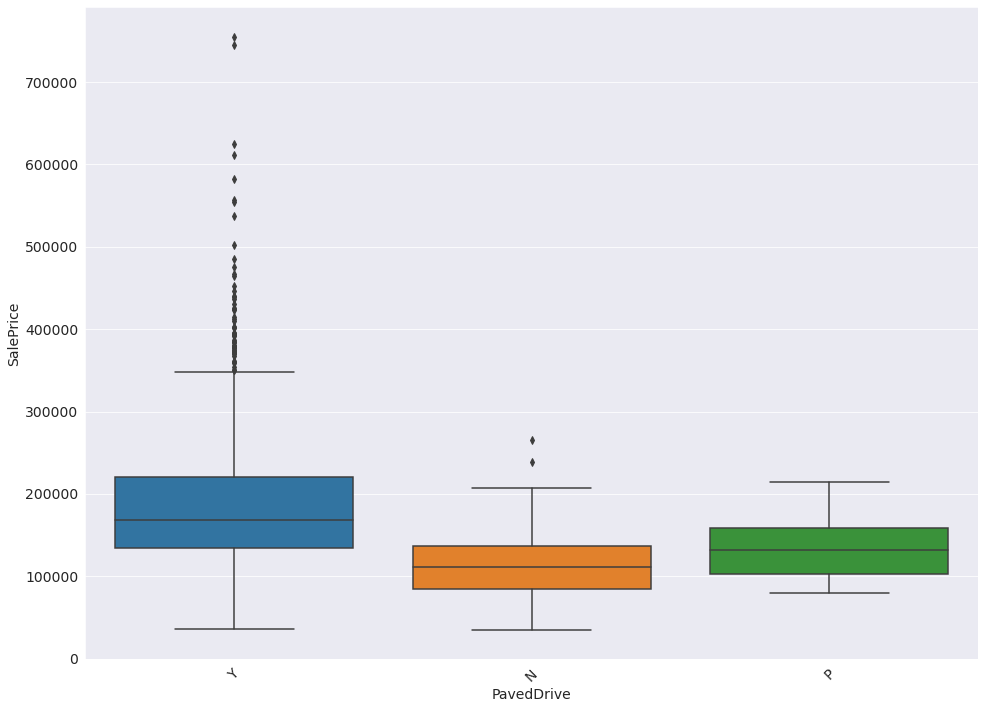

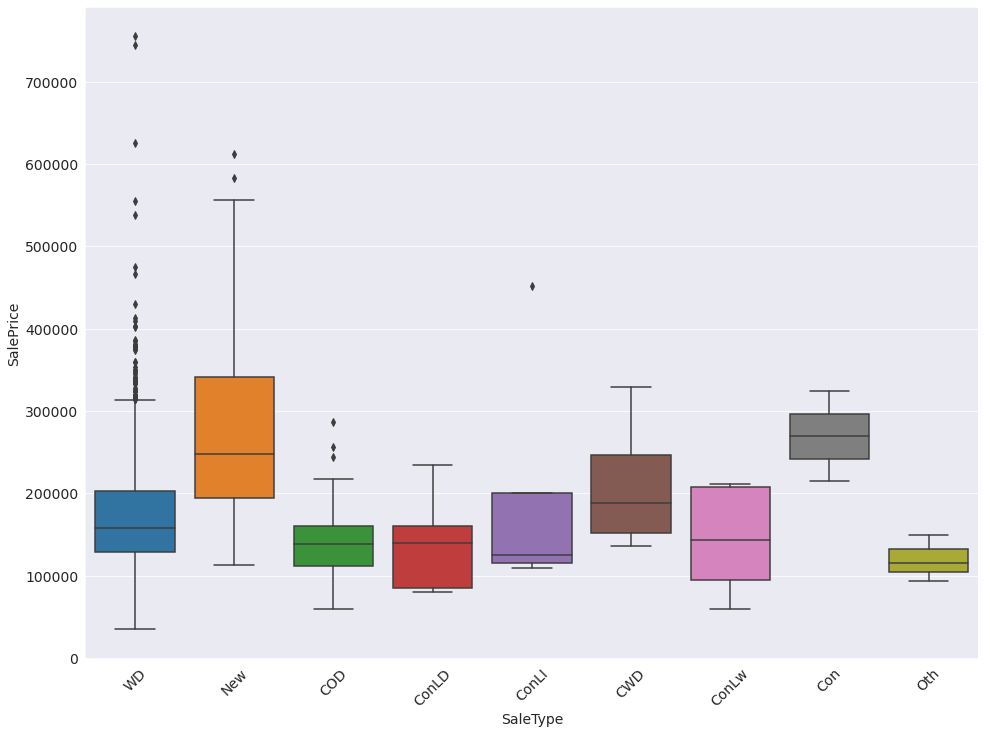

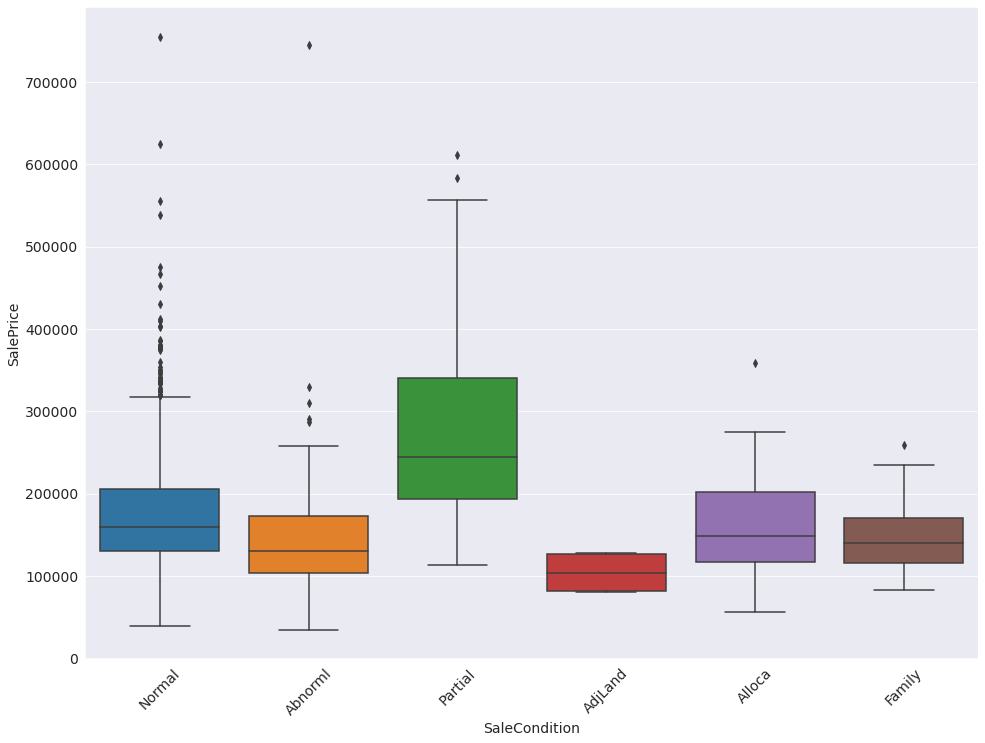

cell_content.py:6:1: W293 blank line contains whitespace



In [121]:
for col in categorical_cols:
    plt.figure(figsize=(16, 12))
    sns.boxplot(x=col, y='SalePrice', data=train_df)
    plt.xticks(rotation=45)
    plt.show()
    
pep8(_ih)

## Pairplot between SalePrice and independant variables

cell_content.py:2:1: E128 continuation line under-indented for visual indent
cell_content.py:2:32: E703 statement ends with a semicolon



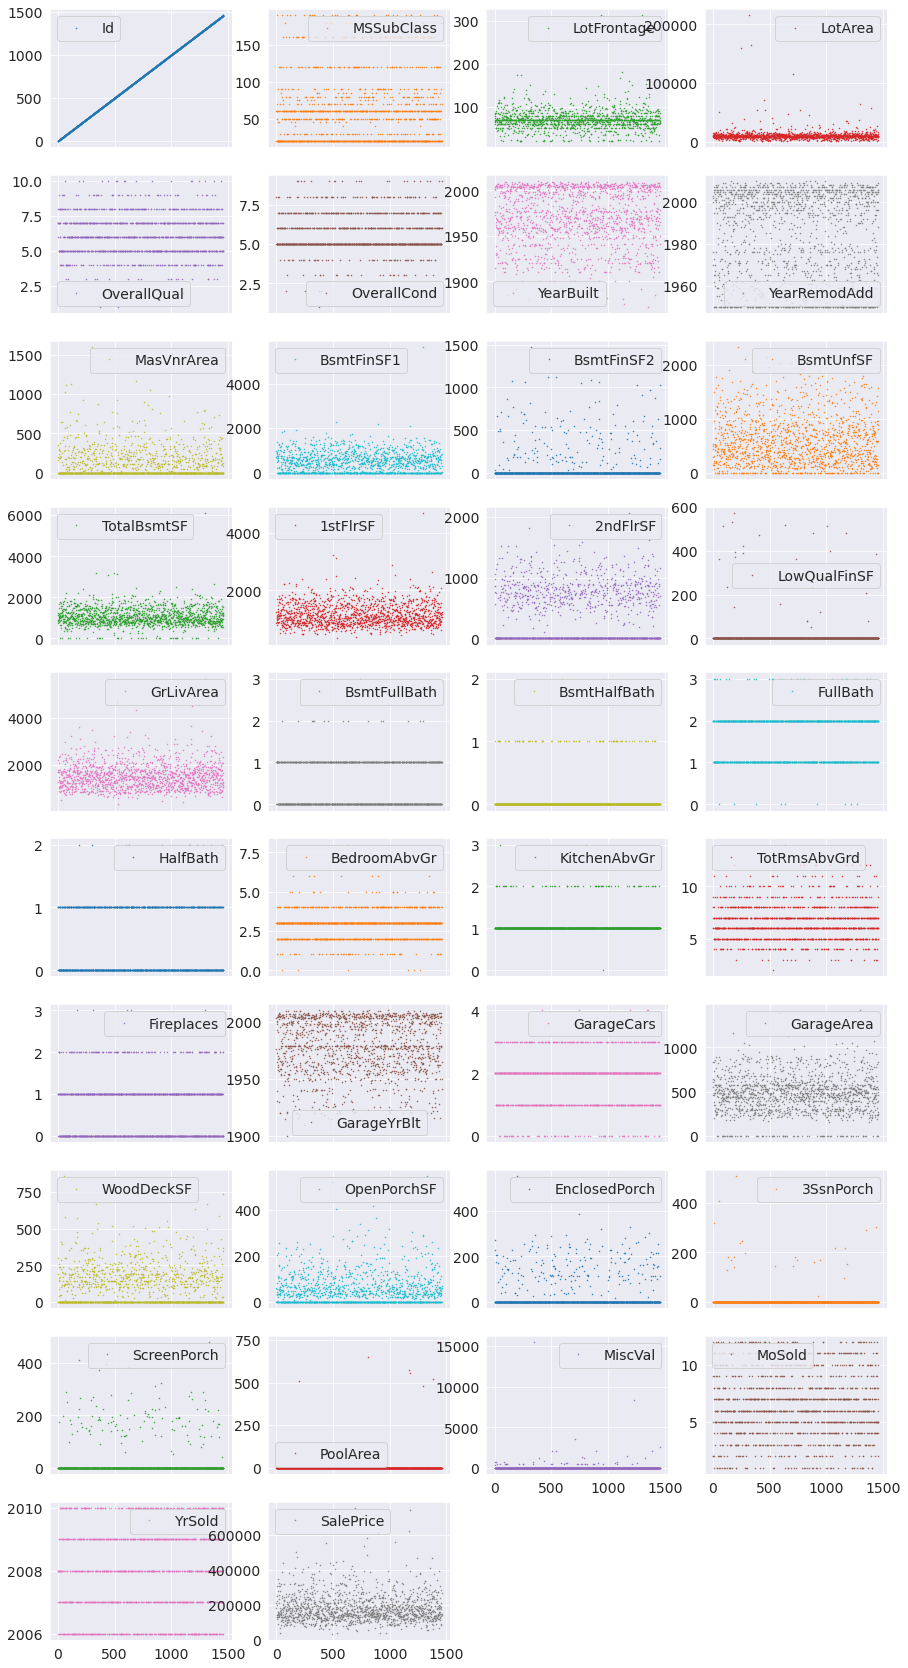

In [122]:
train_df.plot(lw=0, marker=".", subplots=True, layout=(-1, 4),
figsize=(15, 30), markersize=1);
pep8(_ih)

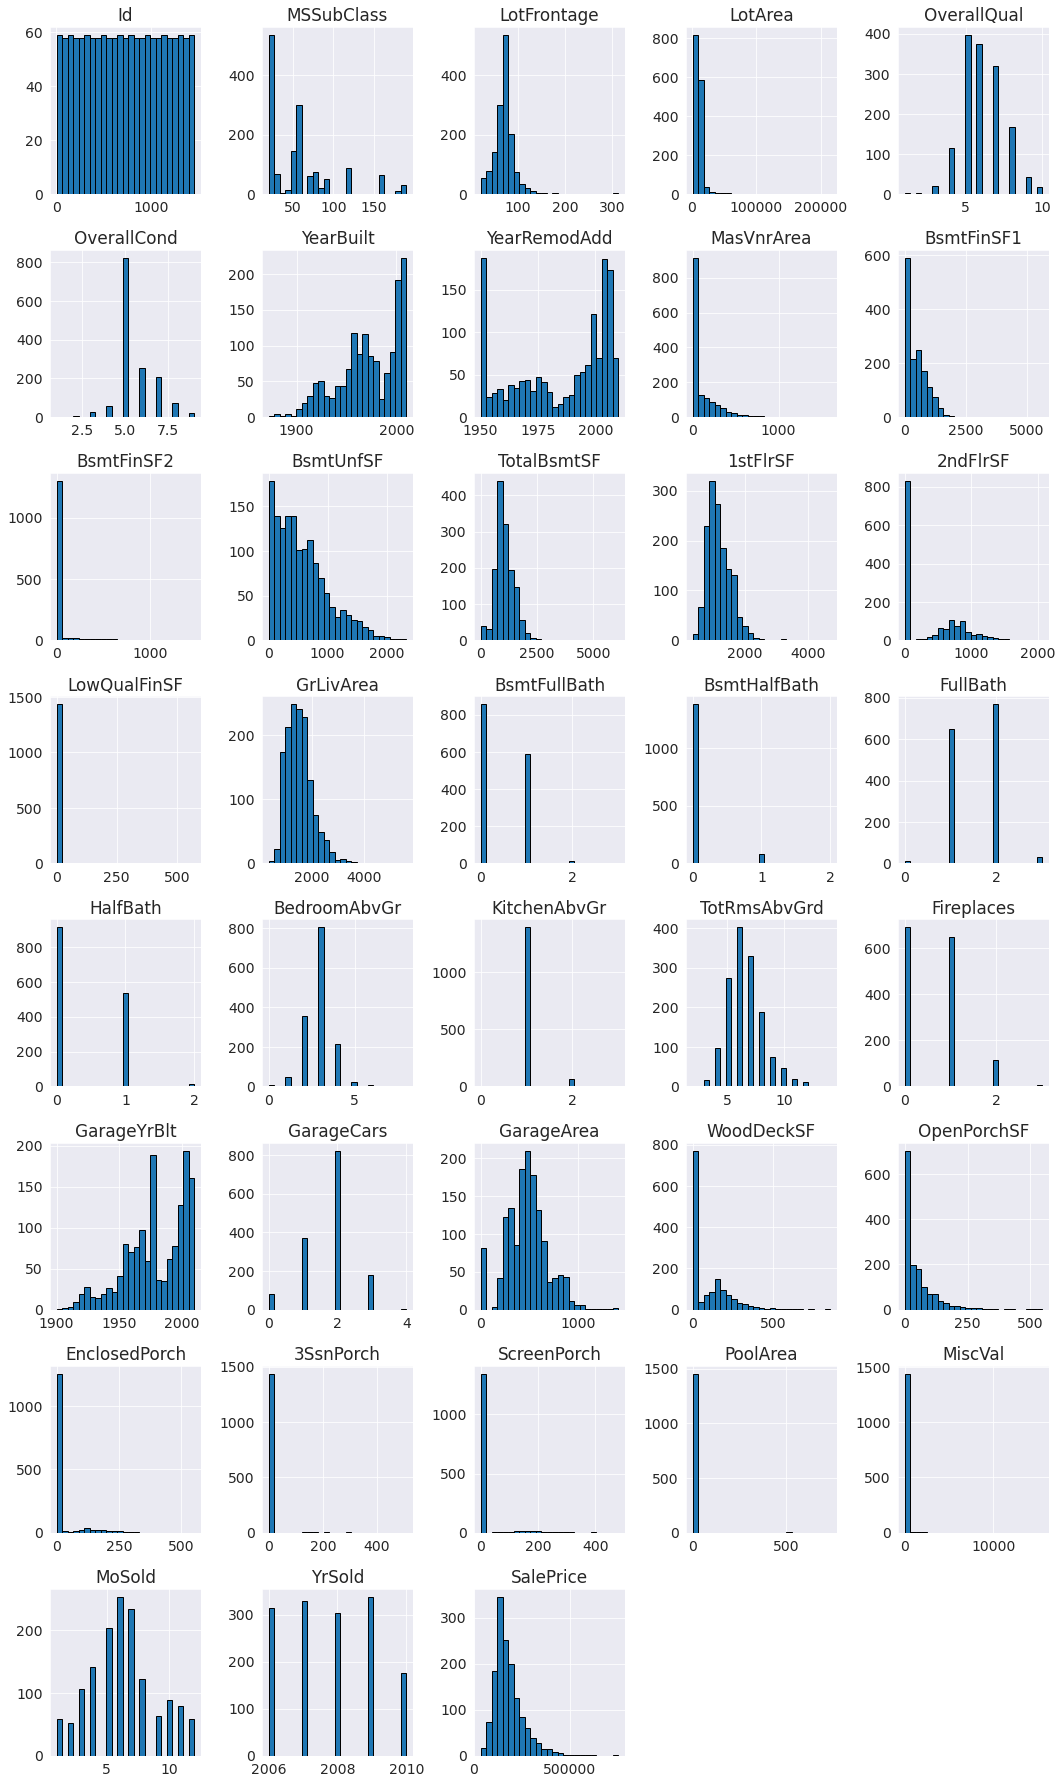

In [123]:
# Plots the histogram for each numerical feature in a separate subplot
train_df.hist(bins=25, figsize=(15, 25), layout=(-1, 5), edgecolor="black")
plt.tight_layout()

pep8(_ih)

## Lets transform the target variable

q1 = np.percentile(train_df.SalePrice, 25)
q3 = np.percentile(train_df.SalePrice, 75)
iqr = q3 - q1
lb = q1 - 1.5 * iqr
ub = q3 + 1.5 * iqr
print('Lower bound:', round(lb, 2))
print('Upper bound:', round(ub, 2))

 train_df = \
train_df[(train_df.SalePrice < ub) \
& (train_df.SalePrice > lb)]
train_df.shape

In [124]:
train_df["SalePrice"] = np.log1p(train_df["SalePrice"])
pep8(_ih)

In [125]:
test_df
pep8(_ih)

In [126]:
print("The training data size before dropping Id feature is : {} ".format(train_df.shape))
print("The test data size before dropping Id feature is : {} ".format(test_df.shape))
pep8(_ih)

The training data size before dropping Id feature is : (1460, 76) 
The test data size before dropping Id feature is : (1459, 75) 
cell_content.py:1:80: E501 line too long (90 > 79 characters)
cell_content.py:2:80: E501 line too long (85 > 79 characters)



In [127]:
train_ID = train_df['Id']
test_ID = test_df['Id']
pep8(_ih)

## We can now drop the Id column from both training and test data

In [128]:
train_df.drop("Id", axis = 1, inplace = True)
test_df.drop("Id", axis = 1, inplace = True)
pep8(_ih)

cell_content.py:1:25: E251 unexpected spaces around keyword / parameter equals
cell_content.py:1:27: E251 unexpected spaces around keyword / parameter equals
cell_content.py:1:38: E251 unexpected spaces around keyword / parameter equals
cell_content.py:1:40: E251 unexpected spaces around keyword / parameter equals
cell_content.py:2:24: E251 unexpected spaces around keyword / parameter equals
cell_content.py:2:26: E251 unexpected spaces around keyword / parameter equals
cell_content.py:2:37: E251 unexpected spaces around keyword / parameter equals
cell_content.py:2:39: E251 unexpected spaces around keyword / parameter equals



In [129]:
label = train_df.SalePrice
label
pep8(_ih)

In [130]:
train_size = train_df.shape[0]
test_size = test_df.shape[0]
y = train_df.SalePrice.values
df = pd.concat((train_df, test_df)).reset_index(drop=True)
df.drop(['SalePrice'], axis=1, inplace=True)
print("The df size is : {}".format(df.shape))
pep8(_ih)

The df size is : (2919, 74)



In [131]:
df.head()
pep8(_ih)

## Encoding categorical columns

In [132]:
for c in categorical_cols:
    lbl = LabelEncoder()
    lbl.fit(list(df[c].values))
    df[c] = lbl.transform(list(df[c].values))

pep8(_ih)

In [133]:
df
pep8(_ih)

## Standard deviation

In [134]:
df.std()
pep8(_ih)

**As we can see, some features have high standard deviation, though moste seem to have a std 2.We want to drop any feature with very low values.**

In [135]:
# Standard deviation threshold
threshold = 1

cols_to_drop = list(df.std()[df.std() < threshold].index.values)

print('Features with very low standard deviation in data:', cols_to_drop)

pep8(_ih)

Features with very low standard deviation in data: ['MSZoning', 'Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'Heating', 'CentralAir', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional', 'Fireplaces', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive']



## Droping features with low std

In [136]:
df = df.drop(cols_to_drop, axis=1)
pep8(_ih)

## Drop highly correlated features

In [137]:
threshold = 0.75

corr_matrix = df.corr().abs()
high_corr_var = np.where(corr_matrix >= threshold)
high_corr_var = [(corr_matrix.index[x],
                 corr_matrix.columns[y],
                 round(corr_matrix.iloc[x,y], 2))
                 for x, y in zip(*high_corr_var)
                 if x != y and x < y]

high_corr_var
pep8(_ih)

cell_content.py:7:42: E231 missing whitespace after ','



### The results indicate that:
* **YearBuilt and GarageYrBlt are highly correlated with a value of .79**
* **Exterior1st and Exterior2nd are highly correlated with a value of .87**
* **TotalBsmtSF and 1stFlrSF are highly correlated with a value of .80**
* **GrLivArea and TotRmsAbvGrd are highly correlated with a value of .81**

In [138]:
collinearity = pd.DataFrame(high_corr_var).rename(columns = {0: 'drop_feature',
                                                             1: 'corr_feature',
                                                             2: 'corr_values'})

collinearity = collinearity.sort_values(by='corr_values', ascending=False)
collinearity = collinearity.reset_index(drop=True)
collinearity
pep8(_ih)

cell_content.py:1:58: E251 unexpected spaces around keyword / parameter equals
cell_content.py:1:60: E251 unexpected spaces around keyword / parameter equals



## Correlated columns to drop

In [139]:
cols_to_drop = list(collinearity['drop_feature'])
print(cols_to_drop)
pep8(_ih)

['Exterior1st', 'GrLivArea', 'TotalBsmtSF', 'YearBuilt']



In [140]:
df = df.drop(cols_to_drop, axis=1)
pep8(_ih)

# Standardizing the dataset

In [141]:
# Intialize a scaler
scaler = StandardScaler()

# Fit on training data
scaler.fit(df)
pep8(_ih)

In [142]:
df_scaled = scaler.transform(df)
df_scaled
pep8(_ih)

# Dimensionality reduction with PCA

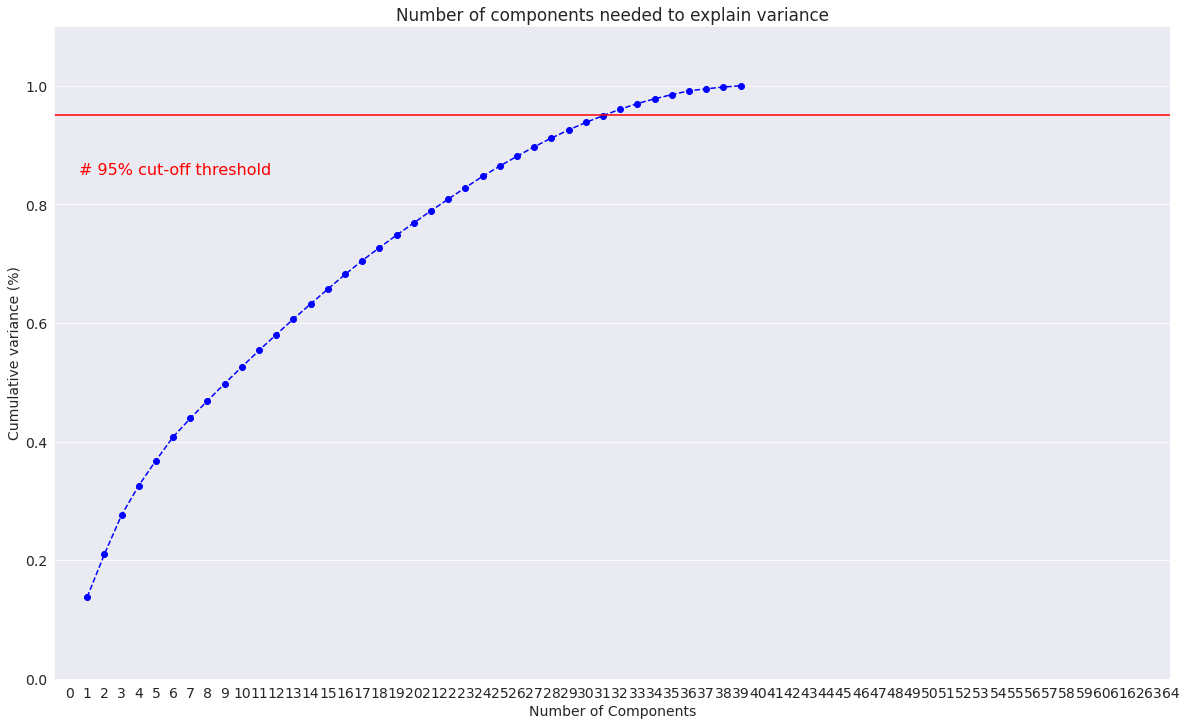

cell_content.py:16:80: E501 line too long (103 > 79 characters)



In [143]:
from sklearn.decomposition import PCA


pca = PCA().fit(StandardScaler().fit_transform(df_scaled))

plt.rcParams["figure.figsize"] = (20, 12)

fig, ax = plt.subplots()
xi = np.arange(1, df.shape[1] + 1, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0, 1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 65, step=1))  # change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('Number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '# 95% cut-off threshold', color='red', fontsize=16)

ax.grid(axis='x')

plt.show()
pep8(_ih)

In [144]:
pca = PCA(n_components=32, random_state=1)
pca.fit(df_scaled)
reduced = pca.transform(df_scaled)
reduced
pep8(_ih)

In [145]:
df_reduced = pd.DataFrame(reduced, columns=["PCA" + str(i) for i in range(1, 33)])
df_reduced
pep8(_ih)

cell_content.py:1:80: E501 line too long (82 > 79 characters)



In [146]:
X_train = df_reduced[:train_size]
X_test = df_reduced[train_size + 2:]
pep8(_ih)

In [147]:
train_final = df_reduced.loc[:train_df.index.max(), :].copy()
test_final = df_reduced.loc[train_df.index.max() + 1:, :].reset_index(drop=True).copy()
pep8(_ih)

cell_content.py:2:80: E501 line too long (87 > 79 characters)



## Let's split our data into training and test set

In [148]:
X_train, X_test, y_train, y_test = train_test_split(train_final, label, train_size=0.8)
pep8(_ih)

cell_content.py:1:80: E501 line too long (87 > 79 characters)



# Training a linear regression model

In [149]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
pep8(_ih)

## Make predictions on the test data.

In [150]:
linreg_y_pred = linreg.predict(X_test)
pep8(_ih)

## Get the first 10 predicted values.

In [151]:
results = pd.concat([y_test.iloc[:10], X_test.iloc[:10]], axis=1)
results.insert(1, 'Saleprice_pred', linreg_y_pred[:10].round(2))
results
pep8(_ih)

## R2 score of linear Regression

In [152]:
print('The Linear Regression model r2 score is: ', r2_score(y_test, linreg_y_pred))
pep8(_ih)

The Linear Regression model r2 score is:  0.8421427446550105
cell_content.py:1:80: E501 line too long (83 > 79 characters)



# Regression trees and sensemble models

In [153]:
reg_tree = DecisionTreeRegressor()
reg_tree.fit(X_train, y_train)
pep8(_ih)

In [154]:
reg_tree_y_pred = reg_tree.predict(X_test)
pep8(_ih)

In [155]:
results['Saleprice_pred'] = reg_tree_y_pred[:10]
results
pep8(_ih)

## R2 score of DecisionTreeRegressor

In [156]:
print('The Decision Tree Regressor model r2 score is: ', r2_score(y_test, reg_tree_y_pred))
pep8(_ih)

The Decision Tree Regressor model r2 score is:  0.6616485974644253
cell_content.py:1:80: E501 line too long (91 > 79 characters)



## Let's visualize the Decision tree

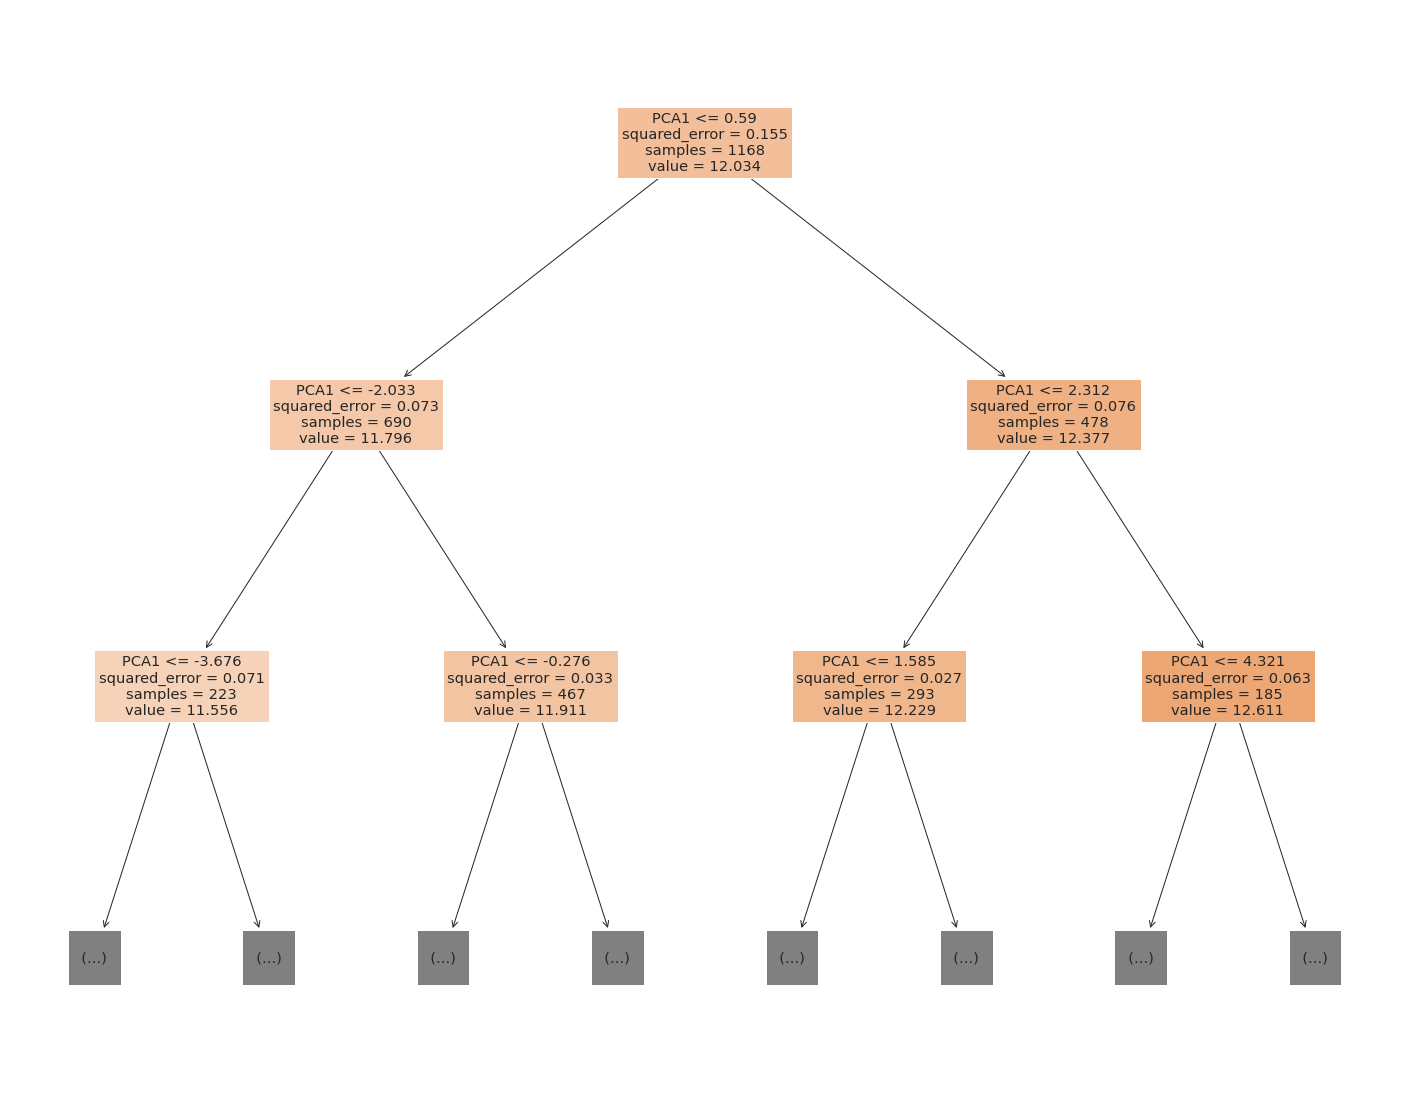

In [157]:
fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(reg_tree,
                   feature_names=list(X_train.columns),
                   max_depth=2,
                   filled=True)
pep8(_ih)

# RandomForest model

In [158]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
pep8(_ih)

In [159]:
rf_y_pred = rf.predict(X_test)
pep8(_ih)

In [160]:
results['Saleprice_pred'] = rf_y_pred[:10]
results
pep8(_ih)

## R2 score of RandomForestRegressor

In [161]:
print('The Random Forest Regressor model r2 score is: ', r2_score(y_test, rf_y_pred))
pep8(_ih)

The Random Forest Regressor model r2 score is:  0.8420272836658769
cell_content.py:1:80: E501 line too long (85 > 79 characters)



# Gradient Boosting model

In [162]:
xgb = XGBRegressor(objective='reg:squarederror', n_jobs=1)
xgb.fit(X_train, y_train)
pep8(_ih)

In [163]:
xgb_y_pred = xgb.predict(X_test)
pep8(_ih)

In [164]:
results['Saleprice_pred'] = xgb_y_pred[:10]
results
pep8(_ih)

## R2 score of Gradient Boosting Regressor

In [165]:
print('The Gradient Boosting model r2 score is: ', r2_score(y_test, rf_y_pred))
pep8(_ih)

The Gradient Boosting model r2 score is:  0.8420272836658769



# Light GBM model

In [166]:
lgbm = LGBMRegressor(objective='regression',
                     num_leaves=5,
                     learning_rate=0.05,
                     n_estimators=720,
                     max_bin=55,
                     bagging_fraction=0.8,
                     bagging_freq=5,
                     feature_fraction=0.2319,
                     feature_fraction_seed=9,
                     bagging_seed=9,
                     min_data_in_leaf=6,
                     min_sum_hessian_in_leaf=11)
lgbm.fit(X_train, y_train)
pep8(_ih)


[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8



In [167]:
lgbm_y_pred = lgbm.predict(X_test)
pep8(_ih)

In [168]:
results['Saleprice_pred'] = lgbm_y_pred[:10]
results
pep8(_ih)

## R2 score of Light GBM model

In [169]:
print('The Light GBM model r2 score is: ', r2_score(y_test, lgbm_y_pred))
pep8(_ih)

The Light GBM model r2 score is:  0.8407924114298334



# Tunning the linear regression model

In [170]:
param_grid = {
    'l1_ratio': [0.1, 0.5, 0.9],
    'alpha': [0.00001, 0.01, 0.1],
    'max_iter': [100, 1000, 10000]
}
print(param_grid)
pep8(_ih)

{'l1_ratio': [0.1, 0.5, 0.9], 'alpha': [1e-05, 0.01, 0.1], 'max_iter': [100, 1000, 10000]}



## Let's perfom grid search for optimal elastic Net hyperparameters

In [171]:
model = ElasticNet()
gs = GridSearchCV(estimator=model,
                  param_grid=param_grid,
                  n_jobs=1,
                  verbose=2)
gs.fit(X_train, y_train)
pep8(_ih)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ............alpha=1e-05, l1_ratio=0.1, max_iter=100; total time=   0.0s
[CV] END ............alpha=1e-05, l1_ratio=0.1, max_iter=100; total time=   0.0s
[CV] END ............alpha=1e-05, l1_ratio=0.1, max_iter=100; total time=   0.0s
[CV] END ............alpha=1e-05, l1_ratio=0.1, max_iter=100; total time=   0.0s
[CV] END ............alpha=1e-05, l1_ratio=0.1, max_iter=100; total time=   0.0s
[CV] END ...........alpha=1e-05, l1_ratio=0.1, max_iter=1000; total time=   0.0s
[CV] END ...........alpha=1e-05, l1_ratio=0.1, max_iter=1000; total time=   0.0s
[CV] END ...........alpha=1e-05, l1_ratio=0.1, max_iter=1000; total time=   0.0s
[CV] END ...........alpha=1e-05, l1_ratio=0.1, max_iter=1000; total time=   0.0s
[CV] END ...........alpha=1e-05, l1_ratio=0.1, max_iter=1000; total time=   0.0s
[CV] END ..........alpha=1e-05, l1_ratio=0.1, max_iter=10000; total time=   0.0s
[CV] END ..........alpha=1e-05, l1_ratio=0.1, m

In [172]:
print('Best R2 score:', round(gs.best_score_, 4))
print('Best parameters:', gs.best_params_)
pep8(_ih)

Best R2 score: 0.8112
Best parameters: {'alpha': 0.01, 'l1_ratio': 0.5, 'max_iter': 100}



## Tuning the Gradient Boosting model

In [173]:
xgb_param_grid = {
    'n_estimators': [500, 525, 550], 
    'max_depth': [3],
    'learning_rate': [0.04, 0.05],
    'colsample_bytree': [0.25, 0.3],
    'subsample': [0.65, 0.7, 0.75]
}
pep8(_ih)

cell_content.py:2:37: W291 trailing whitespace



In [174]:
xgb_tuning = GridSearchCV(
    estimator=xgb,
    param_grid=xgb_param_grid,
    cv=3,
    verbose=True,
    n_jobs=-1
)
pep8(_ih)

In [175]:
best_xgb = xgb_tuning.fit(X_train, y_train)
pep8(_ih)

Fitting 3 folds for each of 36 candidates, totalling 108 fits



In [176]:
best_xgb.fit(X_train, y_train)
pep8(_ih)

Fitting 3 folds for each of 36 candidates, totalling 108 fits



In [177]:
xgb_tun_y_pred = best_xgb.predict(X_test)
pep8(_ih)

In [178]:
results['Saleprice_pred'] = xgb_tun_y_pred[:10]
results
pep8(_ih)

In [179]:
models = ['Linear Regression', 'Decision Tree', 'Random forest', 'Gradient Boosting', 'Light GBM', 'XGB Boosting']

metrics = ['R2', 'MAE', 'MSE']
predictions = ['linreg_y_pred', 'reg_tree_y_pred', 'rf_y_pred', 'xgb_y_pred', 'lgbm_y_pred', 'xgb_tun_y_pred']

# Baseline algorithm
dummy = DummyRegressor()
dummy.fit(X_train, y_train)
dummy_y_pred = dummy.predict(X_test)

scores = np.empty((0, 3))

for i in predictions:
    scores = np.append(scores, 
                       np.array([[r2_score(y_test, globals()[i]),
                                  mean_absolute_error(y_test, globals()[i]),
                                  mean_squared_error(y_test, globals()[i])]]),
                       axis=0)

scores = np.around(scores, 4)
score_df = pd.DataFrame(scores, index=models, columns=metrics)
score_df.sort_values(by='MSE', ascending=True)

pep8(_ih)

cell_content.py:1:80: E501 line too long (114 > 79 characters)
cell_content.py:4:80: E501 line too long (110 > 79 characters)
cell_content.py:14:31: W291 trailing whitespace



## Model Explanation using LIME


In [180]:
from lime.lime_tabular import LimeTabularExplainer
pep8(_ih)

In [181]:
explainer = LimeTabularExplainer(training_data=X_train.values, mode="regression",
feature_names=X_train.columns)
pep8(_ih)

cell_content.py:1:80: E501 line too long (81 > 79 characters)
cell_content.py:2:1: E128 continuation line under-indented for visual indent



In [192]:
i = 10  # ith observation
X_obs = X_train.iloc[[i], :]  # recall iloc from pandas!
# Passing the observation to the trained model "lm" to get prediction.
print("The predicted price based on the given features is: {} Millions\n".format(
    round(linreg.predict(X_obs)[0], 2)))
print("Let's generate how all the given fatures are effecting the predicted price for the selected data point.\n")
# Generates explanations for a prediction.
explanation = explainer.explain_instance(data_row=X_obs.values[0], predict_fn=linreg.predict)
explanation.show_in_notebook(show_table=True, show_all=False)

The predicted price based on the given features is: 11.92 Millions

Let's generate how all the given fatures are effecting the predicted price for the selected data point.



We can see how each features contribute to the prediction. PCA1 has the highest negative impact on house price prediction. In the table we can see global impact of each feature. In blue features with negative impact and in orange color the features with positive impact. 

## Model Explanation using SHAP

In [183]:
import shap
shap.initjs() 
pep8(_ih)

cell_content.py:2:14: W291 trailing whitespace



In [184]:
explainer_shap = shap.Explainer(model=linreg, masker=X_train) 
shap_values = explainer_shap.shap_values(X_train)

pep8(_ih)

cell_content.py:1:62: W291 trailing whitespace



In [185]:
 # The base value, reference value that the feature contributions start from.
print("The base value is: ", explainer_shap.expected_value)
pep8(_ih)

The base value is:  12.030844736251963



In [193]:
shap.force_plot(base_value=explainer_shap.expected_value,
                shap_values=shap_values[i, :],
                features=X_train.iloc[i, :])
pep8(_ih)

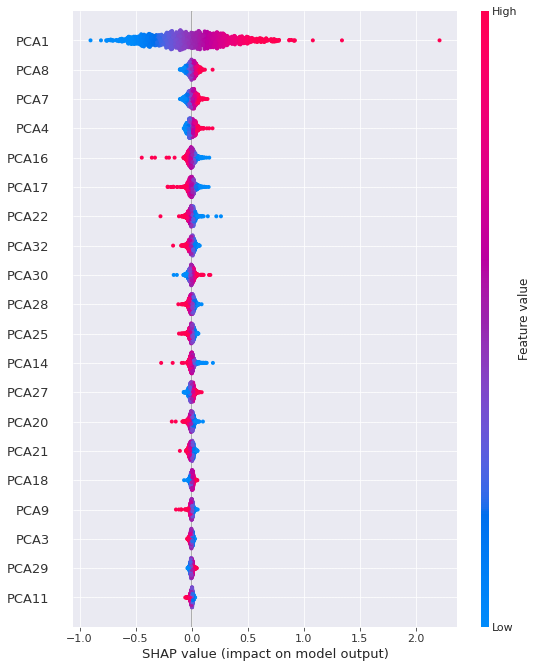

In [194]:
 shap.summary_plot(shap_values, X_train)
pep8(_ih)

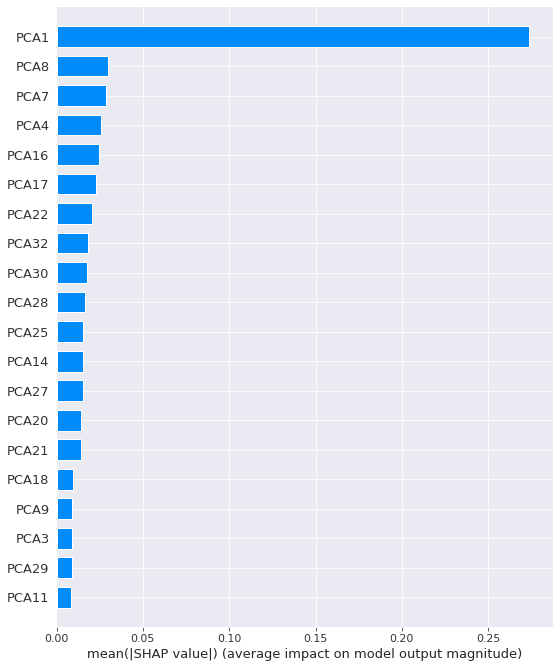

In [189]:
shap.summary_plot(shap_values, X_train, plot_type="bar")
pep8(_ih)

# Evaluating my models

In [195]:
y_pred_test = np.exp(best_xgb.predict(test_final))
df_submission = pd.DataFrame({'Id': test_ID,
                              'SalePrice': np.round(y_pred_test.reshape(1459,).tolist())})
df_submission.head()
pep8(_ih)

cell_content.py:3:80: E501 line too long (90 > 79 characters)



# Saving my submission

In [191]:
df_submission.to_csv('submission.csv', index=False)
pep8(_ih)